In [14]:
import glob, re, os
import numpy as np
import matplotlib.pyplot as plt
from typing import List

In [15]:
%run ../scripts/cardiac_tools.py

In [16]:
data_dirs = []
regex = r'data_hearts_dd_0p2*'
DIR='../data/intracardiac_dataset/'
for x in os.listdir(DIR):
    if re.match(regex, x):
        data_dirs.append(DIR + x)
file_pairs = read_data_dirs(data_dirs)
print('Number of file pairs: {}'.format(len(file_pairs)))
# example of file pair
print("Example of file pair:")
print("{}\n{}".format(file_pairs[0][0], file_pairs[0][1]))

Number of file pairs: 16117
Example of file pair:
../data/intracardiac_dataset/data_hearts_dd_0p2_geo_act_1_bcl_gkr/pECGData_hearts_dd_0p2_geo_act_1_bcl_gkr_bcl.1000.gkr.000.pattern.0.volunteer.v12.npy
../data/intracardiac_dataset/data_hearts_dd_0p2_geo_act_1_bcl_gkr/VmData_hearts_dd_0p2_geo_act_1_bcl_gkr_bcl.1000.gkr.000.pattern.0.volunteer.v12.npy


Case 213 : ../data/intracardiac_dataset/data_hearts_dd_0p2_geo_act_1_bcl_gkr/pECGData_hearts_dd_0p2_geo_act_1_bcl_gkr_bcl.1000.gkr.050.pattern.11.volunteer.v9.npy


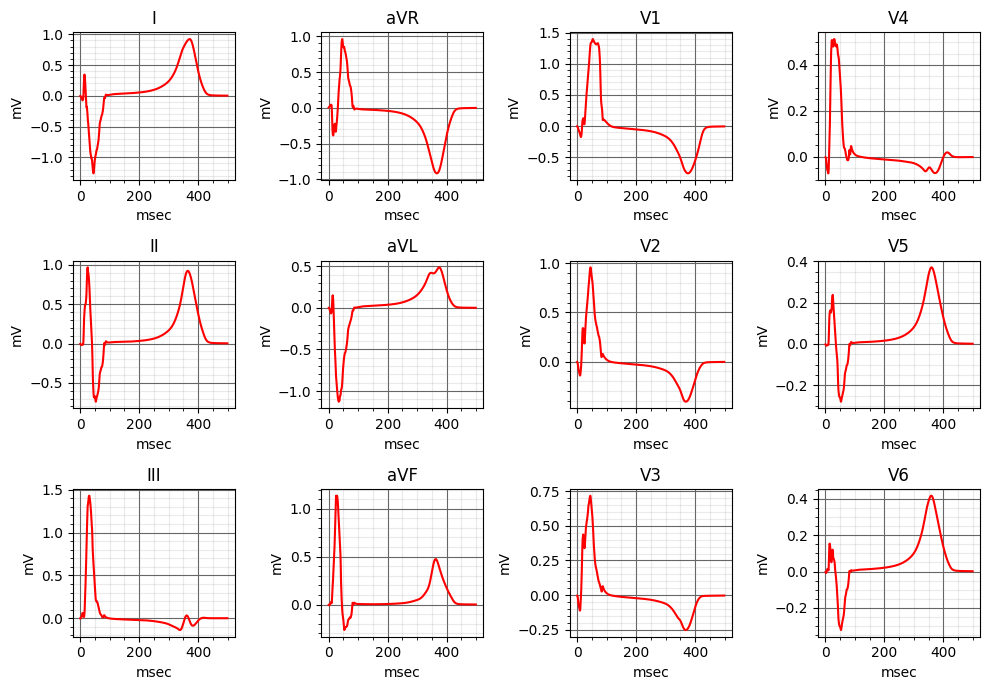

In [17]:
# Example of file pair
case = 213
# ECG plot
row = 3 
column = 4
num_timesteps = 500
plt.figure(figsize=(10, 7))
titles = ["I", "II", "III", "aVR", "aVL", "aVF", "V1", "V2", "V3", "V4", "V5", "V6"]
reorder = {1:1,2:5,3:9,4:2,5:6,6:10,7:3,8:7,9:11,10:4,11:8,12:12} # reorder the leads to standard 12-lead ECG display

print('Case {} : {}'.format(case, file_pairs[case][0]))
pECGData = np.load(file_pairs[case][0])
pECGData = get_standard_leads(pECGData)

# create a figure with 12 subplots
for i in range(pECGData.shape[1]):
    plt.subplot(row, column, reorder[i + 1])
    plt.plot(pECGData[0:num_timesteps,i],'r')
    plt.title(titles[i])
    plt.grid(visible=True, which='major', color='#666666', linestyle='-')
    plt.minorticks_on()
    plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
    plt.xlabel('msec')
    plt.ylabel('mV')
plt.tight_layout()
plt.show()
# close
plt.close()

Case 213 : ../data/intracardiac_dataset/data_hearts_dd_0p2_geo_act_1_bcl_gkr/pECGData_hearts_dd_0p2_geo_act_1_bcl_gkr_bcl.1000.gkr.050.pattern.11.volunteer.v9.npy


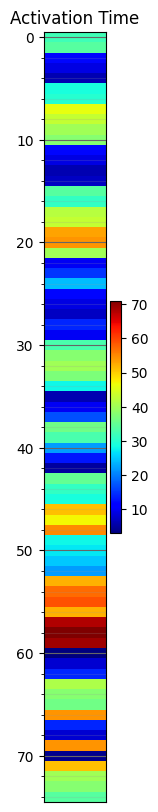

In [18]:
# Example of file pair
case = 213
plt.figure(figsize=(1, 10))

print('Case {} : {}'.format(case, file_pairs[case][0]))
VmData = np.load(file_pairs[case][1])

ActTime = get_activation_time(VmData)

# plot the Activation Time array
plt.imshow(ActTime, cmap='jet', interpolation='nearest', aspect='auto')
plt.title('Activation Time')
plt.colorbar()
plt.grid(visible=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
# not xticks
plt.xticks([])
plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.show()

Case 213 : ../data/intracardiac_dataset/data_hearts_dd_0p2_geo_act_1_bcl_gkr/pECGData_hearts_dd_0p2_geo_act_1_bcl_gkr_bcl.1000.gkr.050.pattern.11.volunteer.v9.npy
Case 213 : ../data/intracardiac_dataset/data_hearts_dd_0p2_geo_act_1_bcl_gkr/pECGData_hearts_dd_0p2_geo_act_1_bcl_gkr_bcl.1000.gkr.050.pattern.11.volunteer.v9.npy


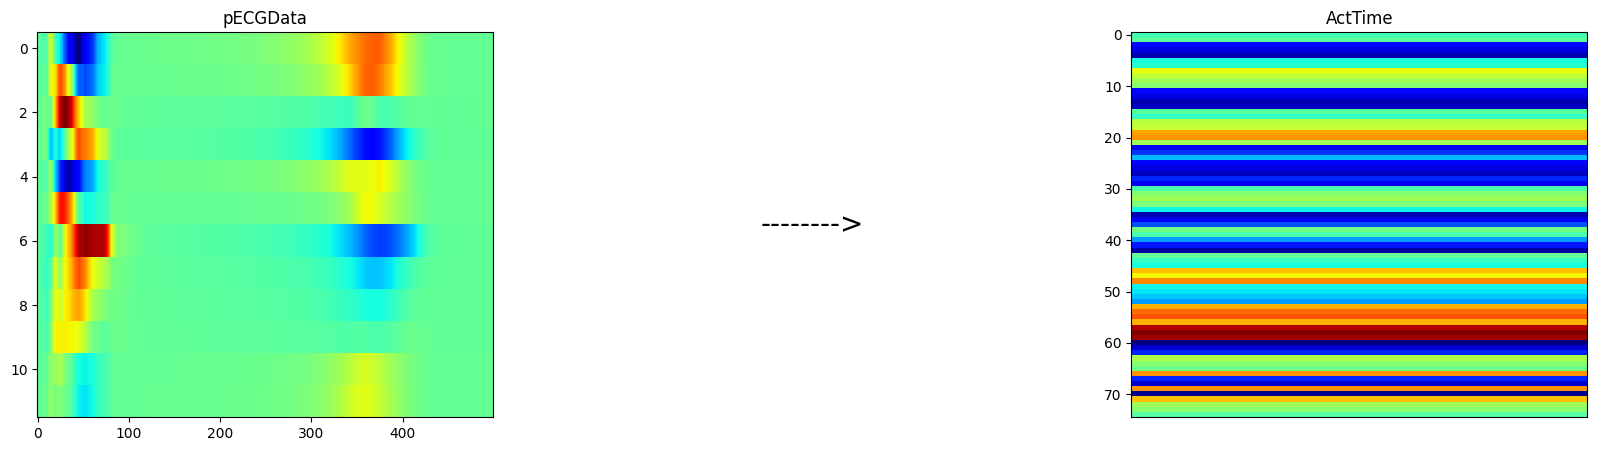

In [19]:
# make a plot with the "pECGData" -> "ActTime"
case = 213

print('Case {} : {}'.format(case, file_pairs[case][0]))
pECGData = np.load(file_pairs[case][0])
pECGData = get_standard_leads(pECGData)

print('Case {} : {}'.format(case, file_pairs[case][0]))
VmData = np.load(file_pairs[case][1])
ActTime = get_activation_time(VmData)

# plot in row the tensors pECGData and ActTime with an arrow pointing to the activation time
row = 1
column = 3
plt.figure(figsize=(20, 5))
plt.subplot(row, column, 1)
# plot pECGData transposed
plt.imshow(pECGData.T, cmap='jet', interpolation='nearest', aspect='auto')
plt.title('pECGData')
plt.subplot(row, column, 2)
# print an arrow
plt.text(0.5, 0.5, '-------->', horizontalalignment='center', verticalalignment='center', fontsize=20)
plt.axis('off')
plt.subplot(row, column, 3)
# plot ActTime
plt.imshow(ActTime, cmap='jet', interpolation='nearest', aspect='auto')
# not xticks
plt.xticks([])
plt.title('ActTime')
plt.show()
plt.close()

In [20]:
X = []
y = []

def min_max_normalize(X: List[np.ndarray]) -> List[np.ndarray]:
    X_min = np.min(X)
    X_max = np.max(X)
    return [(x - X_min) / (X_max - X_min) for x in X]
   
for pair in file_pairs:
    pECGData = np.load(pair[0])
    pECGData = get_standard_leads(pECGData).T
    pECGData = min_max_normalize(pECGData)
    VmData = np.load(pair[1])
    ActTime = get_activation_time(VmData).T
    X.append(pECGData)
    y.append(ActTime)

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [22]:
print('X_train shape: {}'.format(X_train.shape))
print('X_test shape: {}'.format(X_test.shape))
print('y_train shape: {}'.format(y_train.shape))
print('y_test shape: {}'.format(y_test.shape))

X_train shape: (12893, 12, 500)
X_test shape: (3224, 12, 500)
y_train shape: (12893, 1, 75)
y_test shape: (3224, 1, 75)


In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Input, Flatten, Reshape, LSTM
import numpy as np

def build_model(input_shape: tuple, output_shape: tuple) -> Sequential:
    model = Sequential([
        # Input layer
        Input(shape=input_shape),
        
        # CNN layers to extract features from ECG signals
        Conv1D(64, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Conv1D(128, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        
        # Flatten the output to fit into Dense layers
        Flatten(),
        
        # Dense layers
        Dense(256, activation='relu'),
        Dense(128, activation='relu'),
        
        # Output layer
        Dense(np.prod(output_shape), activation='linear'),
        Reshape(output_shape)
    ])
    
    model.compile(optimizer='adam', loss='mse', metrics=['mse'])
    return model

# Corrected input shape and output shape
input_shape = (12, 500)
output_shape = (1, 75)

model = build_model(input_shape=input_shape, output_shape=output_shape)
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 10, 64)         │        96,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 5, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 3, 128)         │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 75)             │         9,675 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 1, 75)          │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 196,363 (767.04 KB)

 Trainable params: 196,363 (767.04 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
history = model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_split=0.2, verbose=1, callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)])

Epoch 1/1000
323/323 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1509.3553 - mse: 1509.3553 - val_loss: 581.3871 - val_mse: 581.3871
Epoch 2/1000
323/323 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 513.0502 - mse: 513.0502 - val_loss: 334.2378 - val_mse: 334.2378
Epoch 3/1000
323/323 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 336.3966 - mse: 336.3966 - val_loss: 305.9354 - val_mse: 305.9354
Epoch 4/1000
323/323 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 310.3364 - mse: 310.3364 - val_loss: 295.2090 - val_mse: 295.2090
Epoch 5/1000
323/323 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 293.6667 - mse: 293.6667 - val_loss: 285.5768 - val_mse: 285.5768
Epoch 6/1000
323/323 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 286.3792 - mse: 286.3792 - val_loss: 281.3050 - val_mse: 281.3050
Epoch 7/1000
323/323 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 279.3223 - mse: 279.3223 - val_loss: 271.2744 - val_mse: 271.2744
Epoch 8/1000
323/323 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 275.1626 - mse: 275.1626 - val_loss: 268

101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


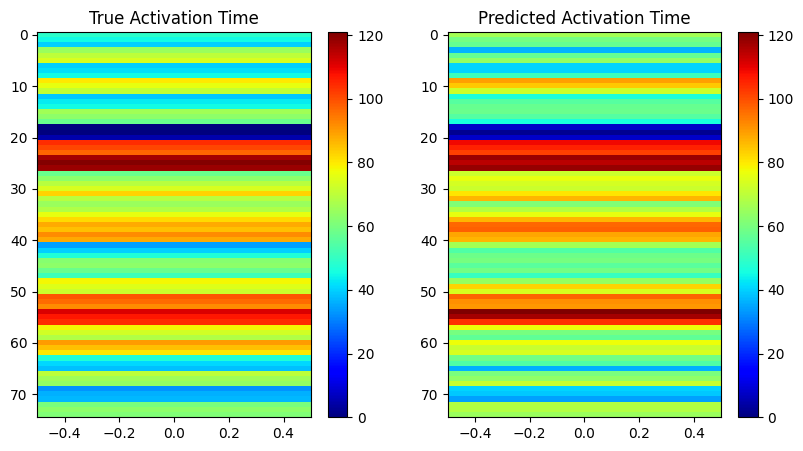

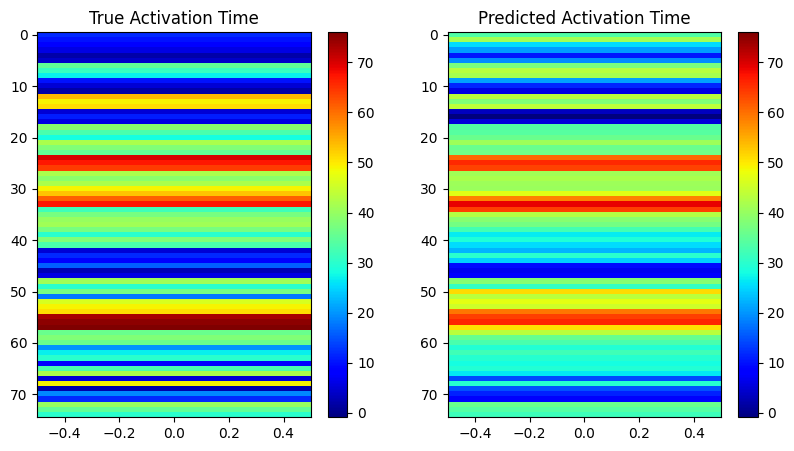

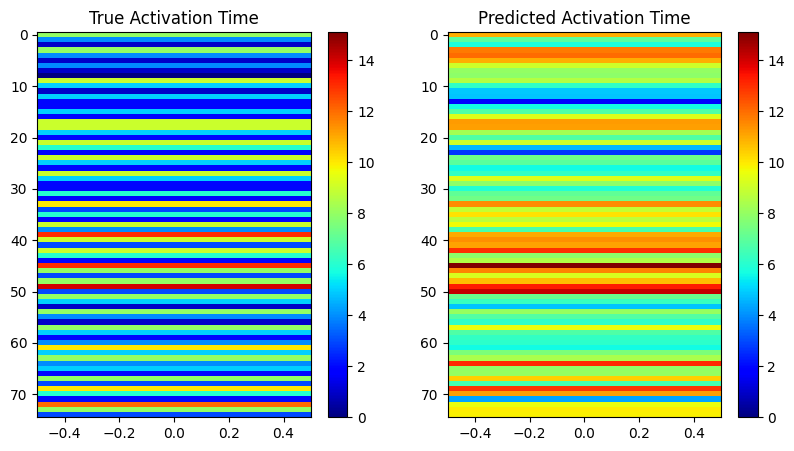

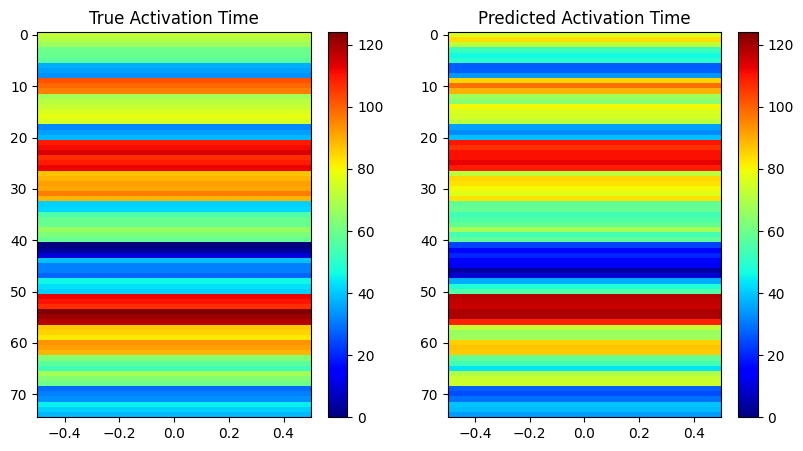

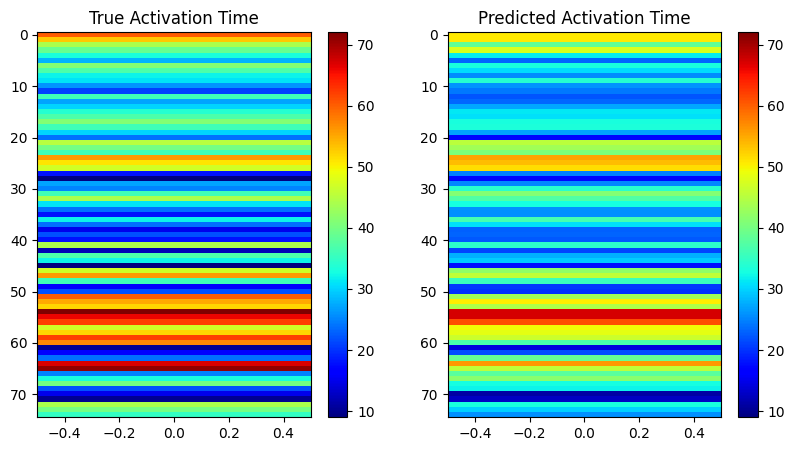

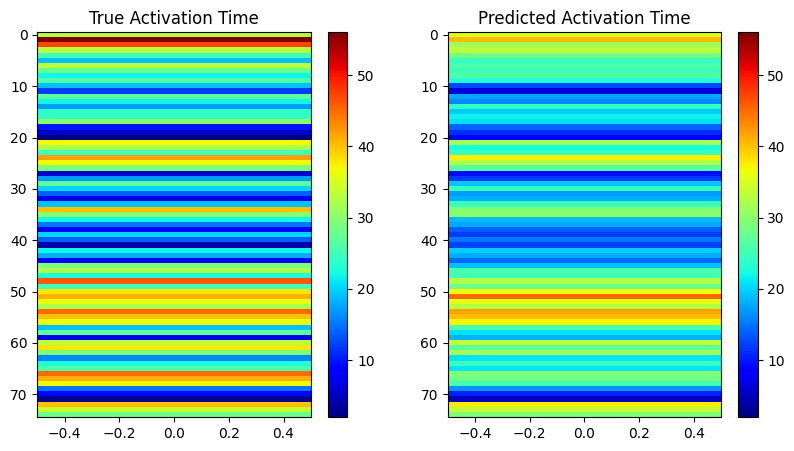

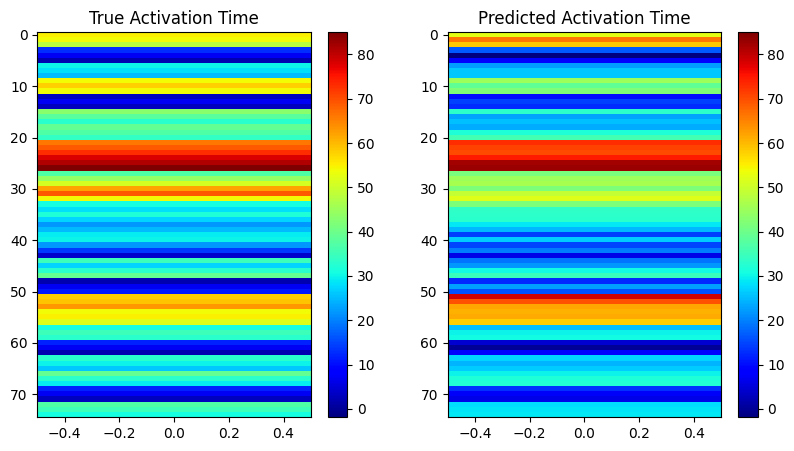

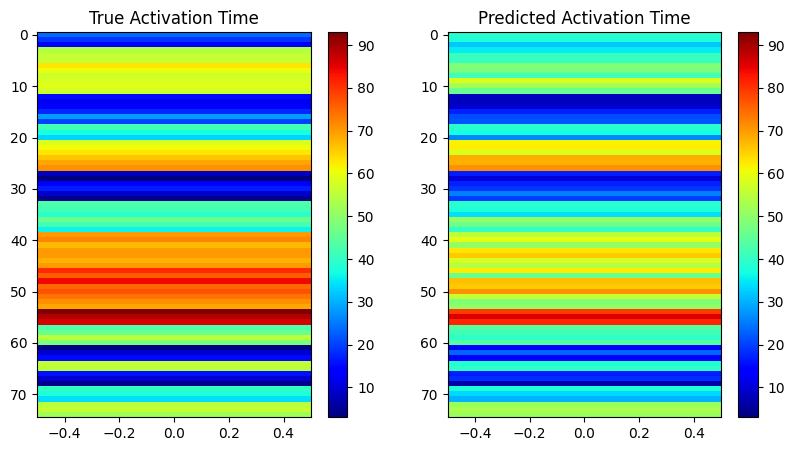

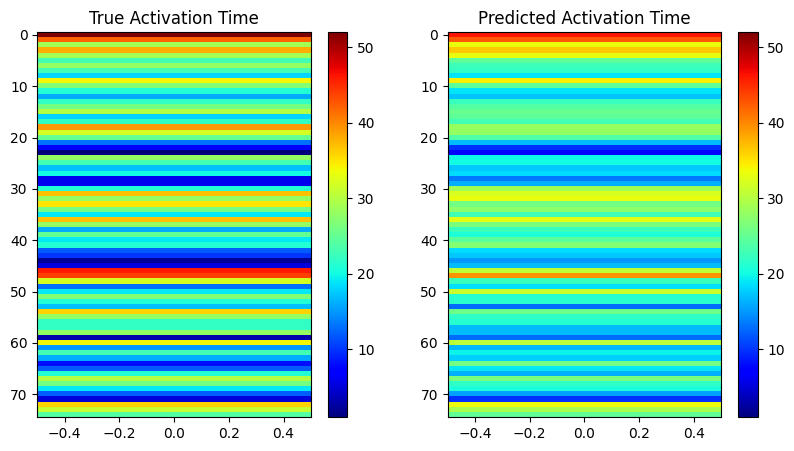

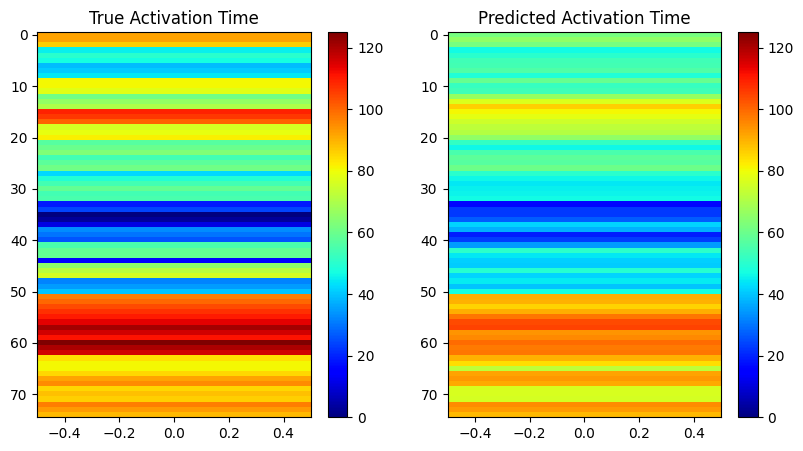

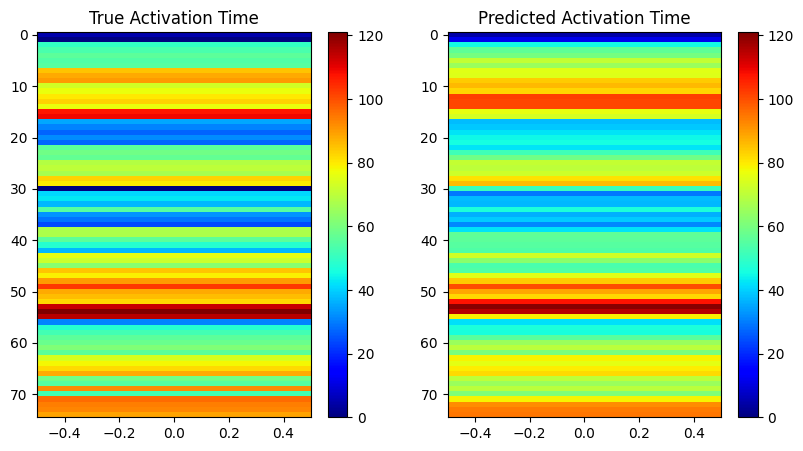

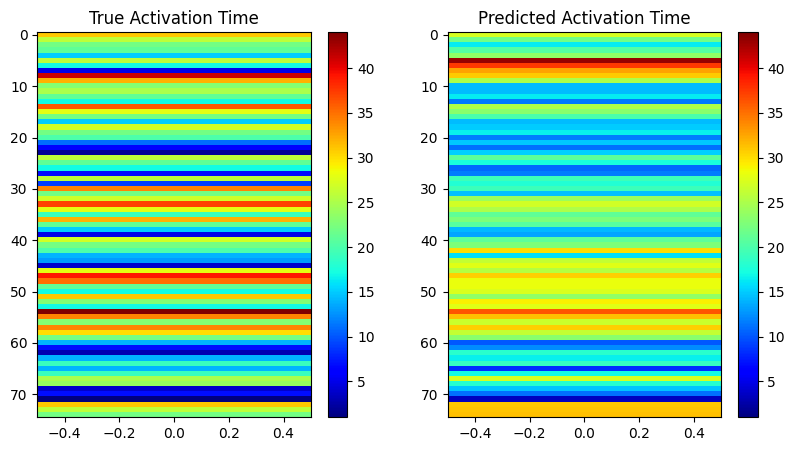

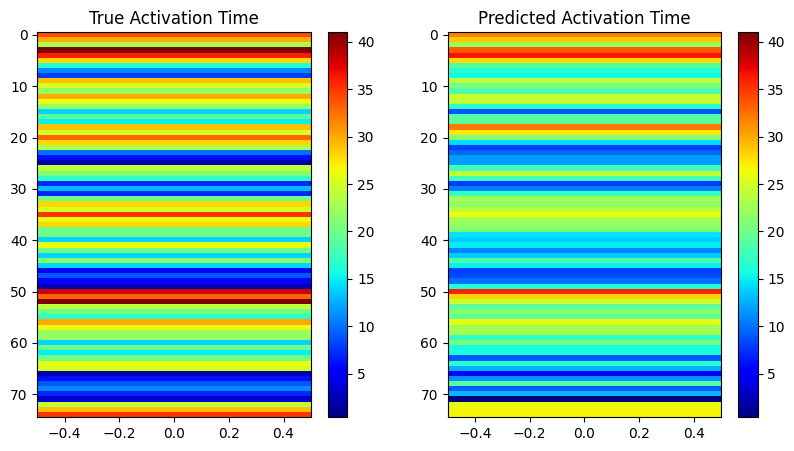

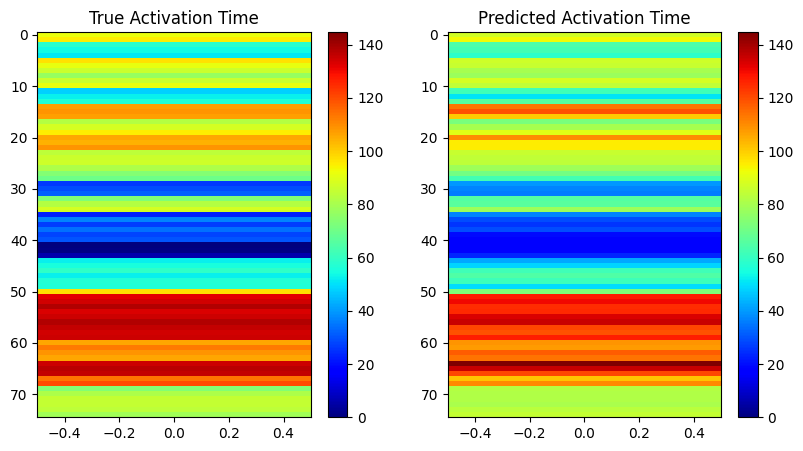

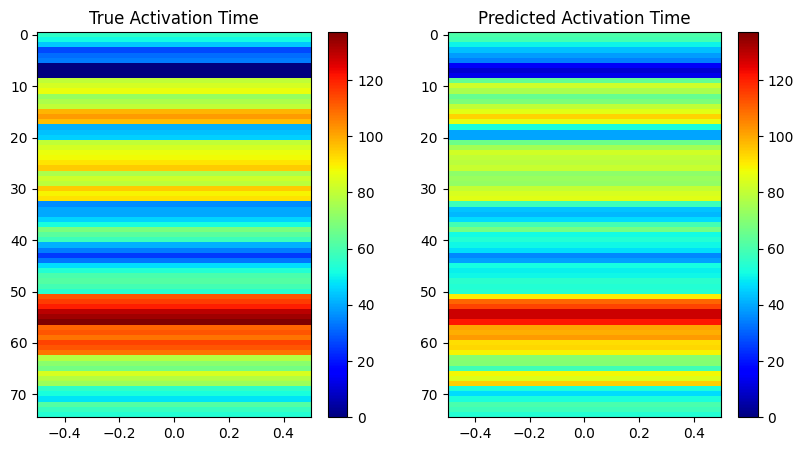

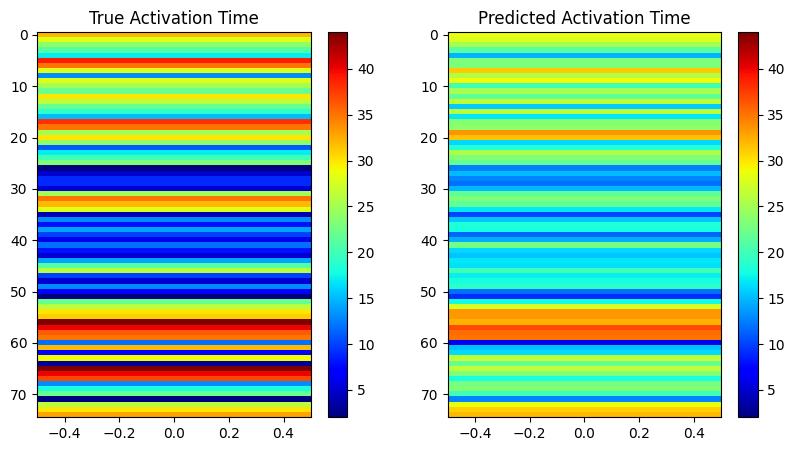

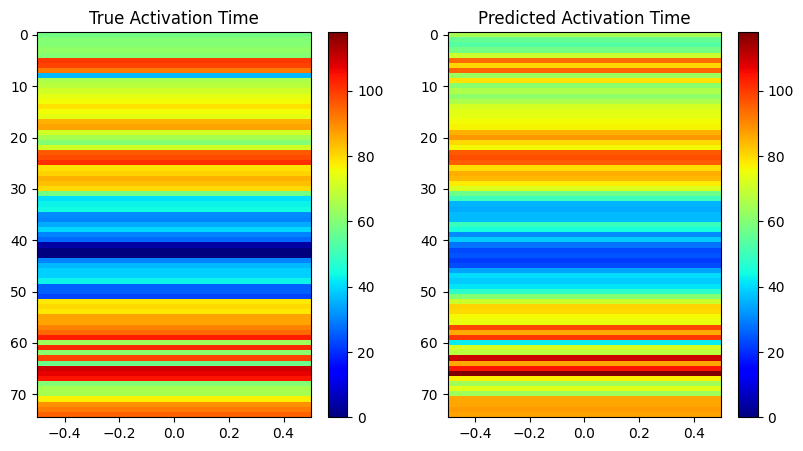

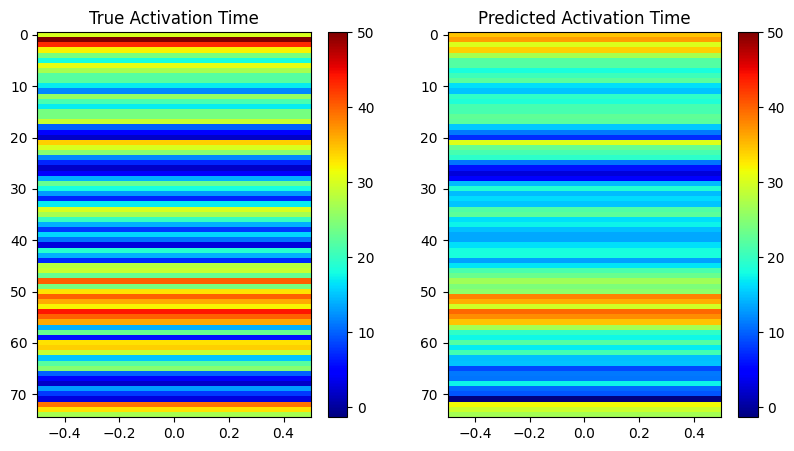

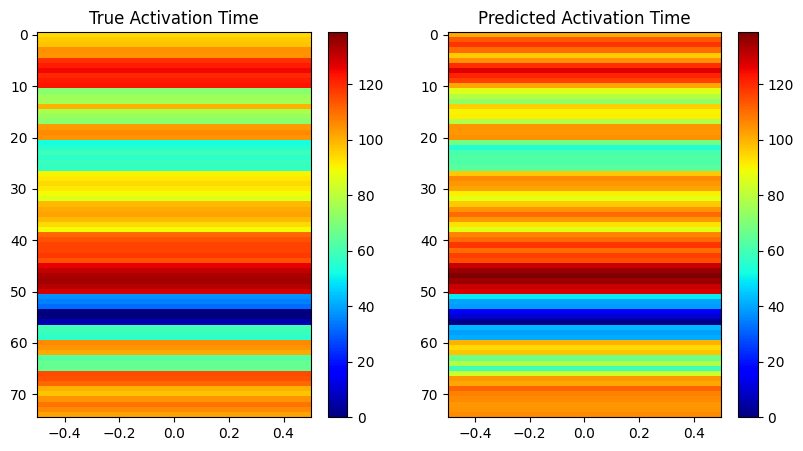

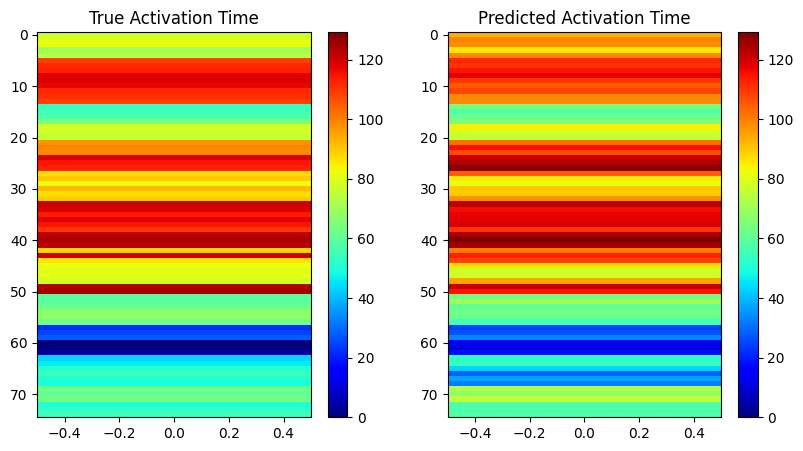

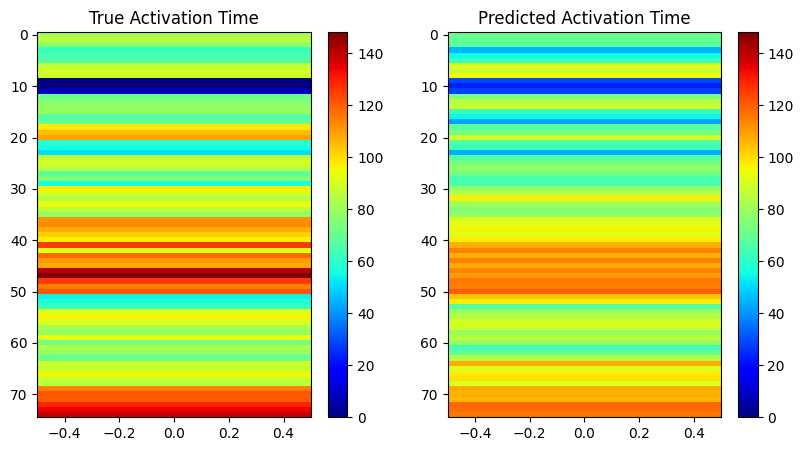

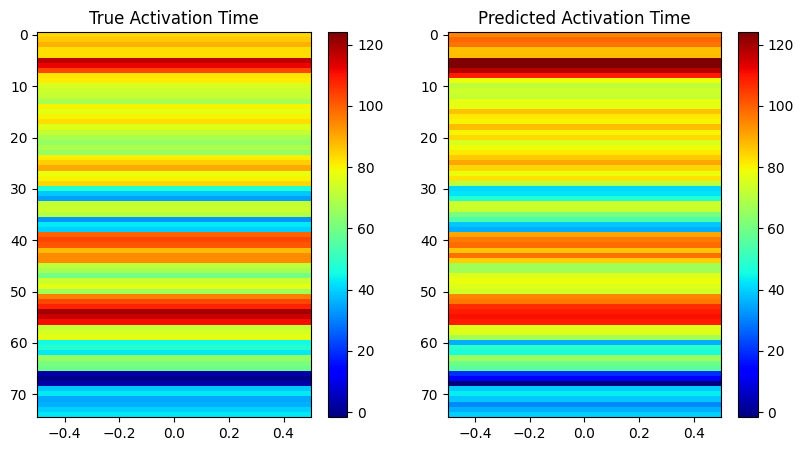

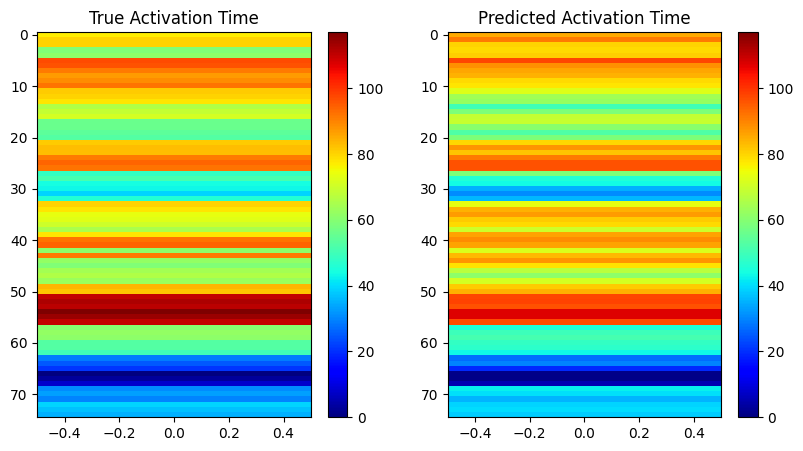

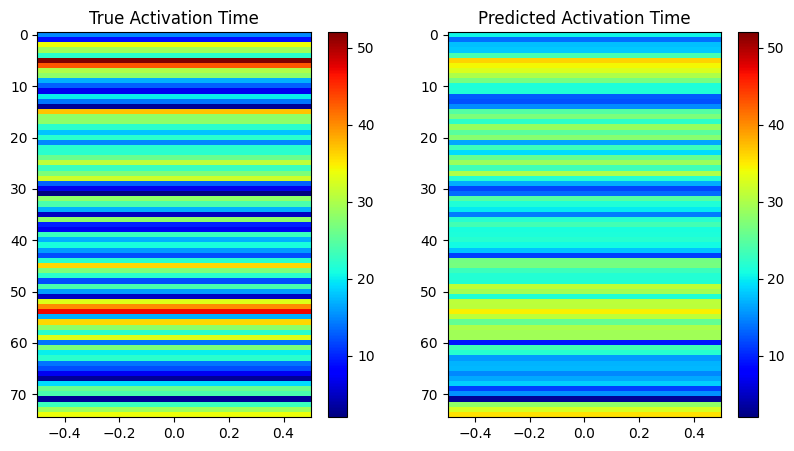

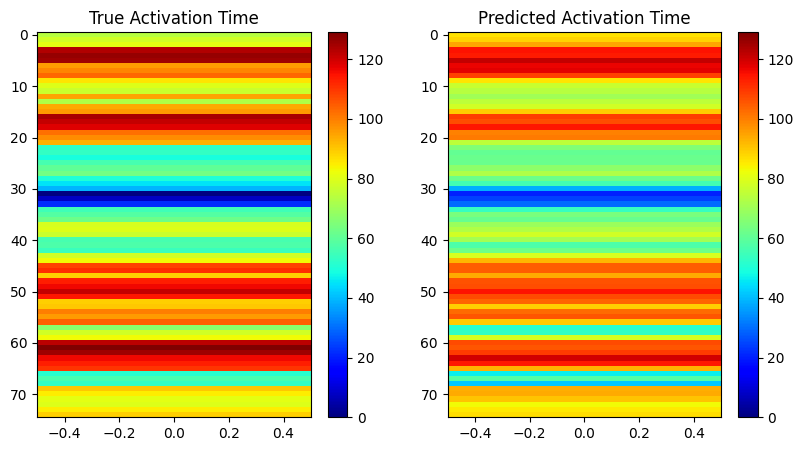

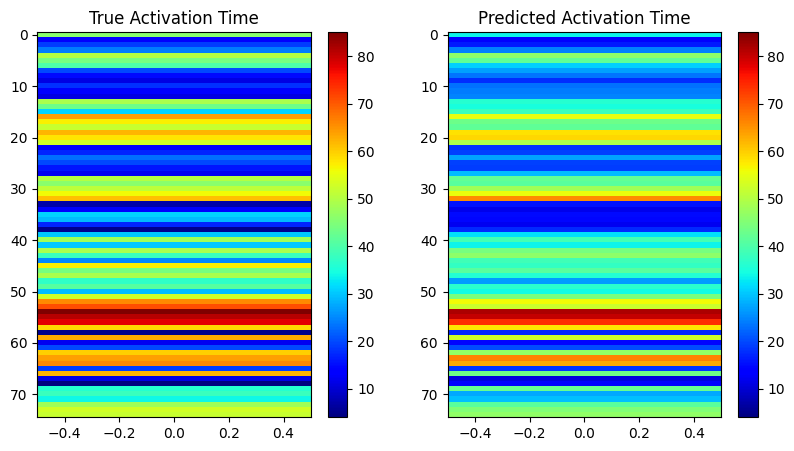

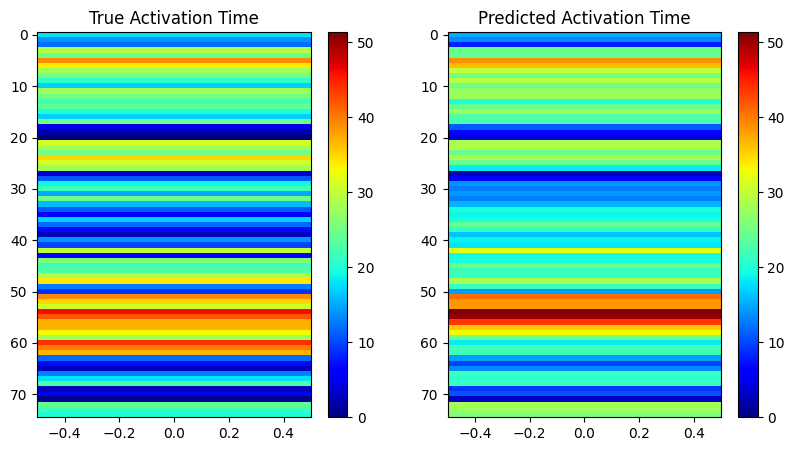

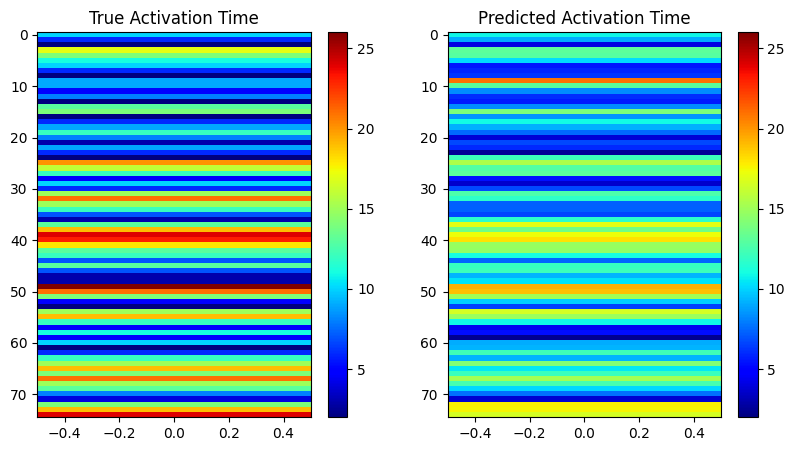

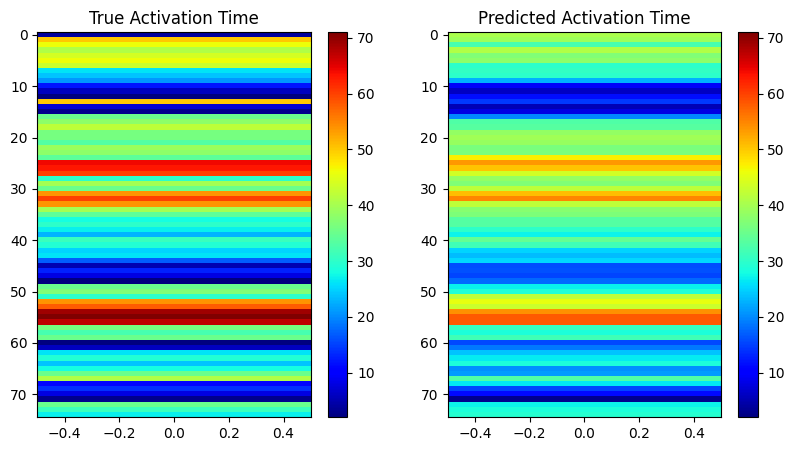

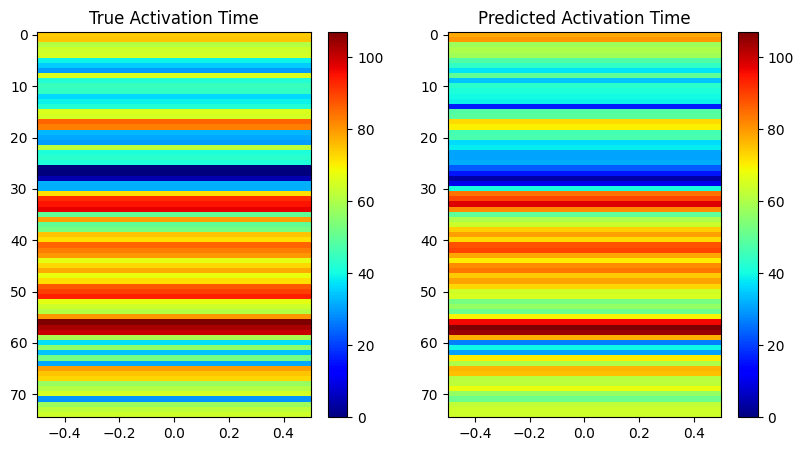

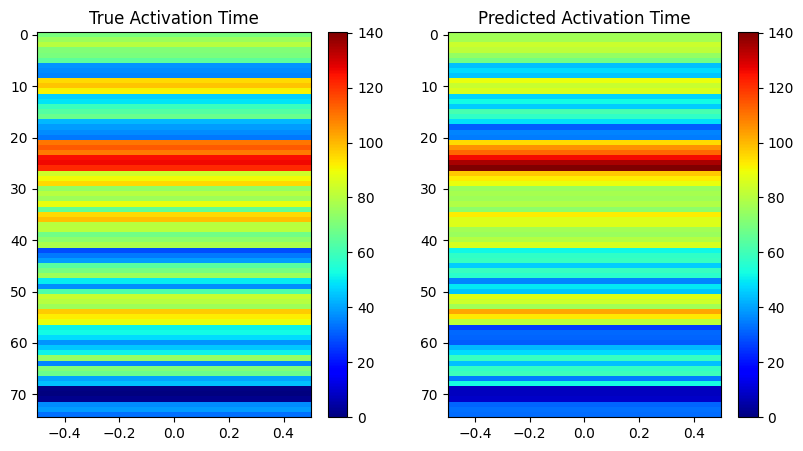

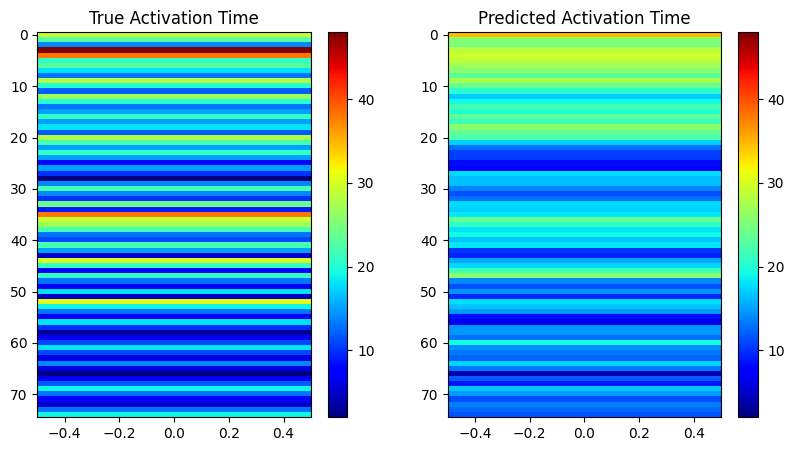

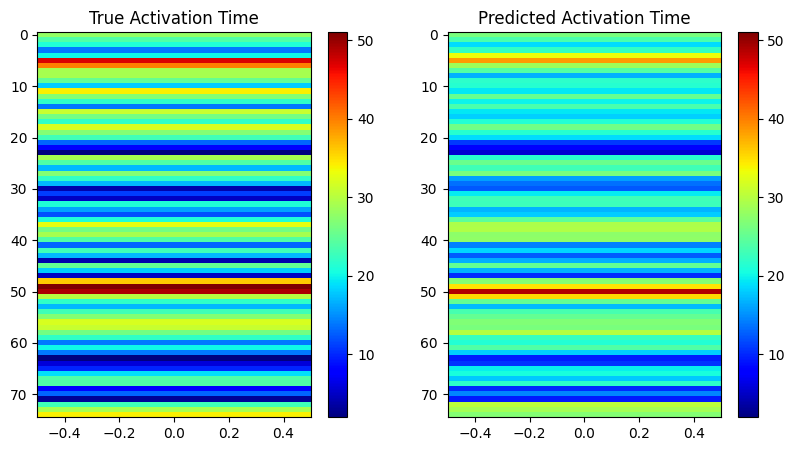

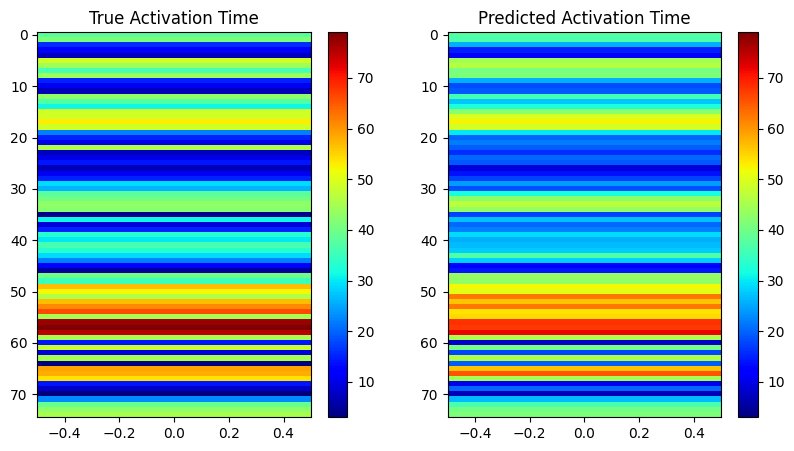

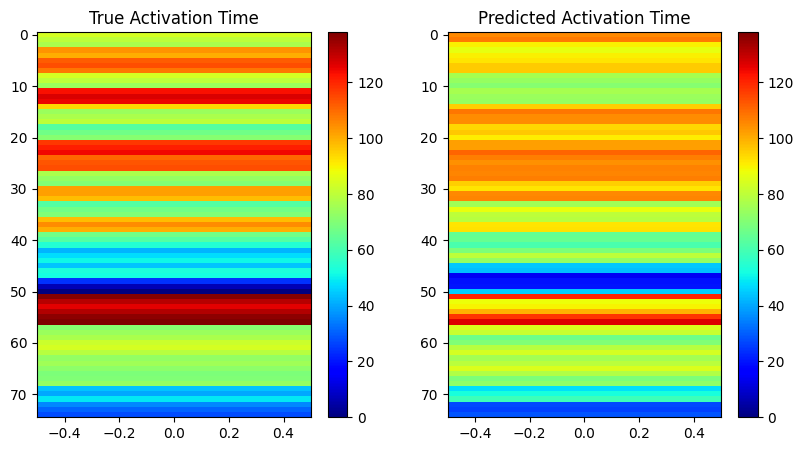

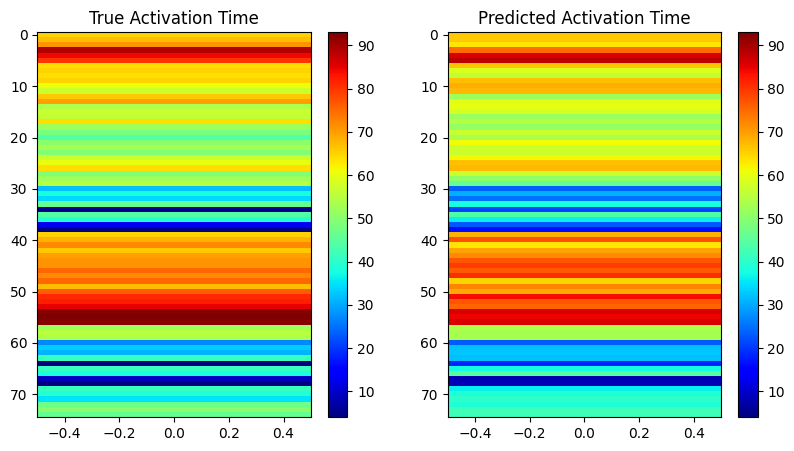

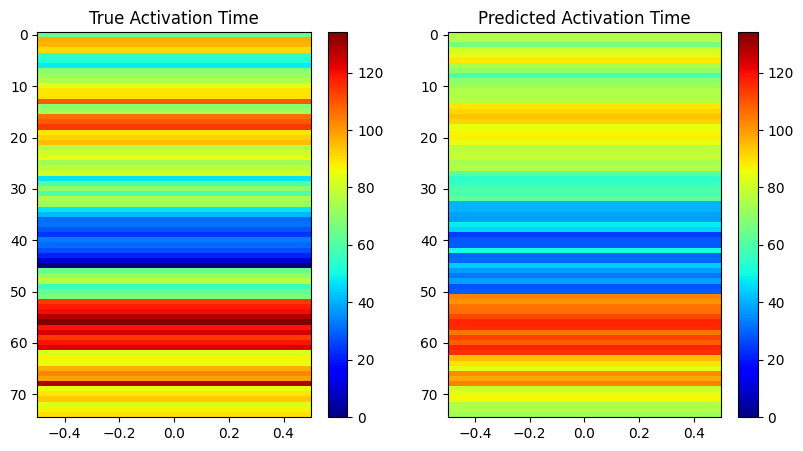

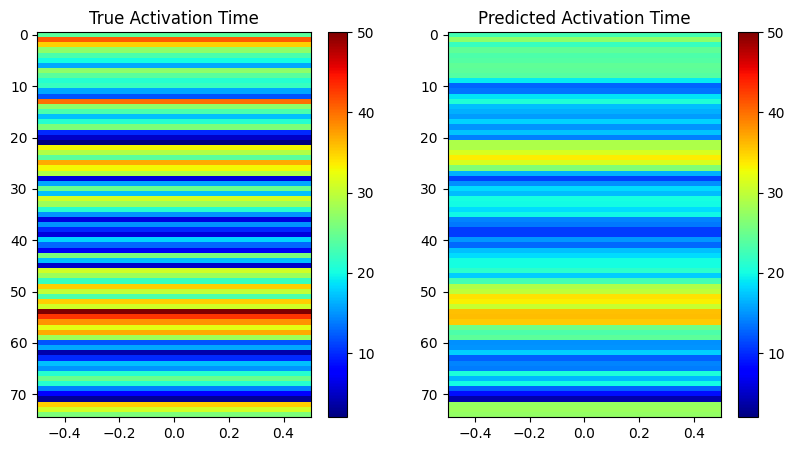

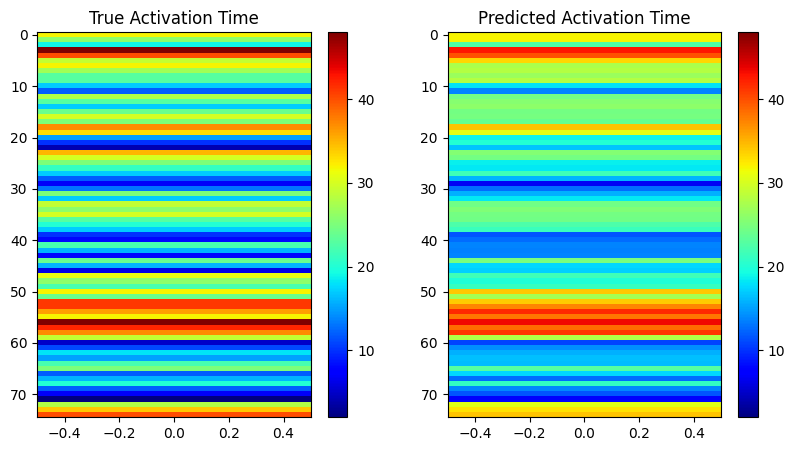

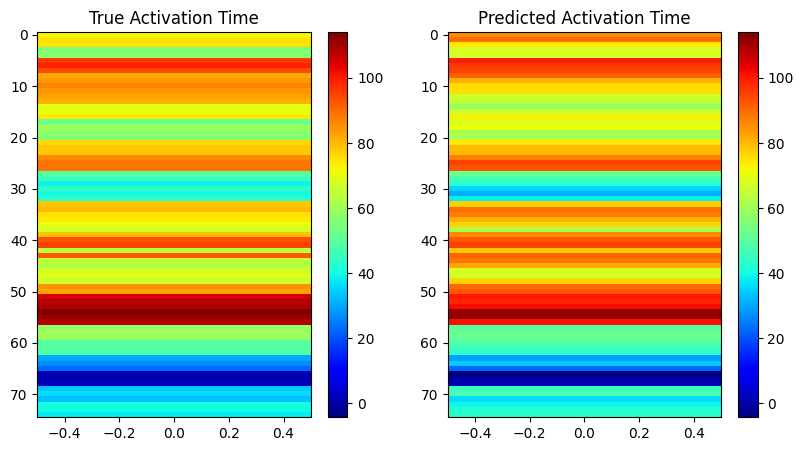

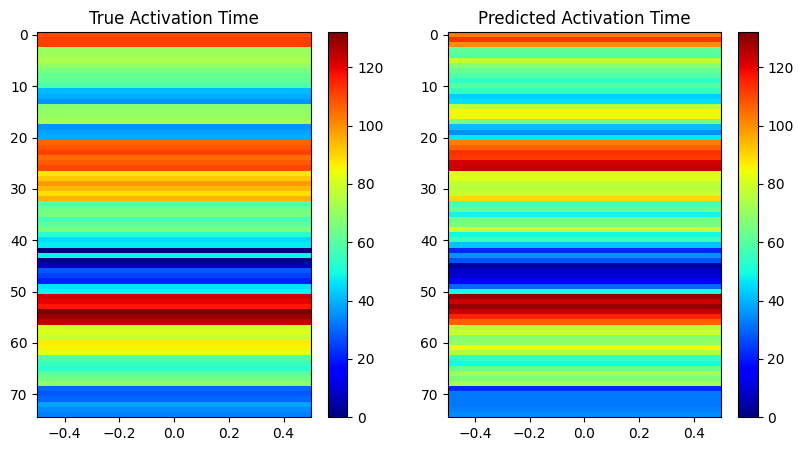

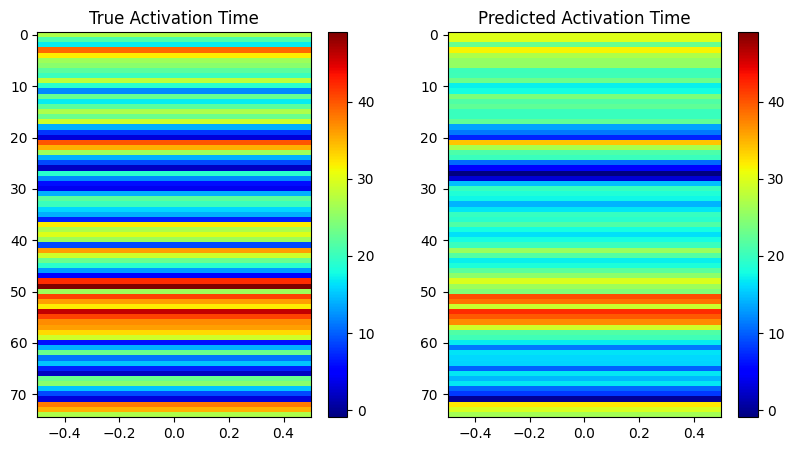

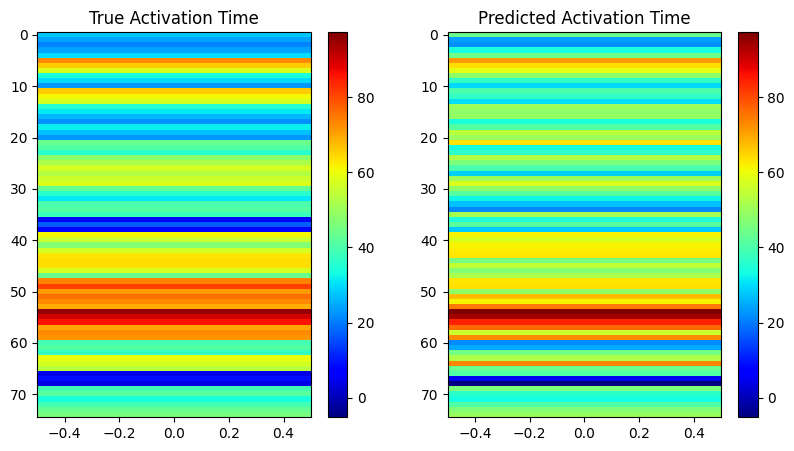

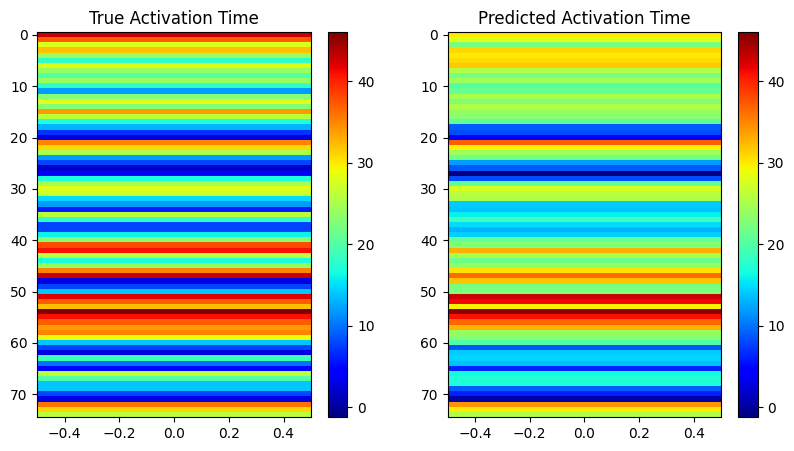

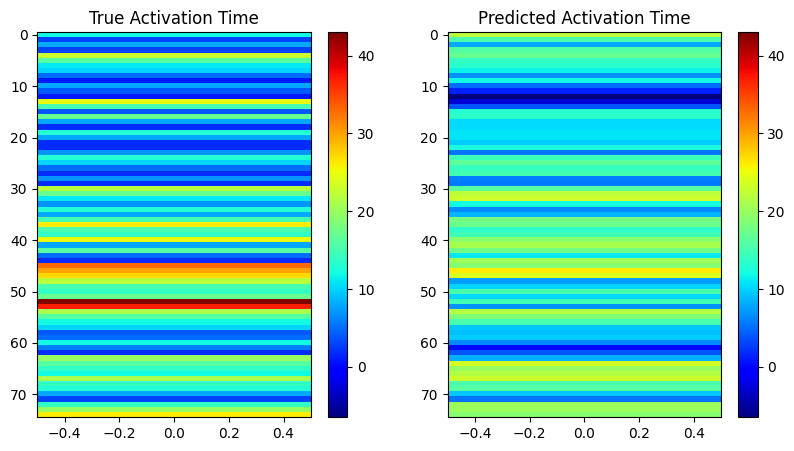

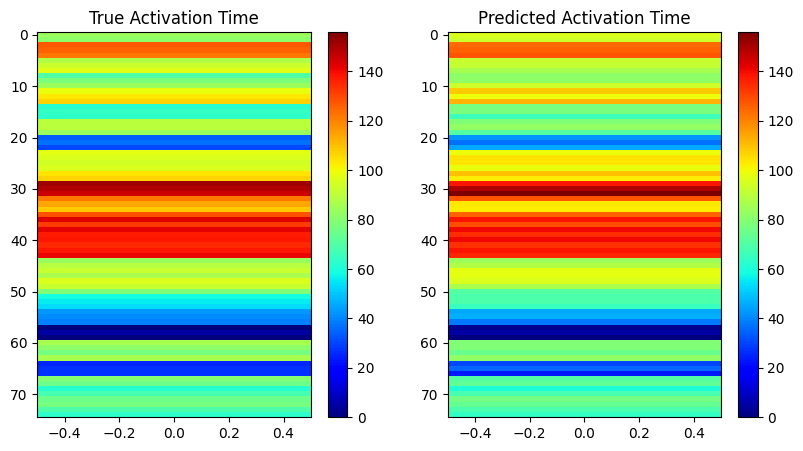

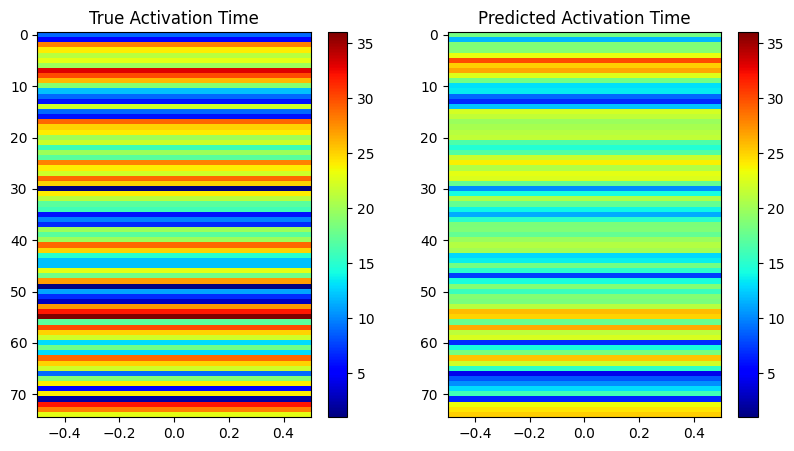

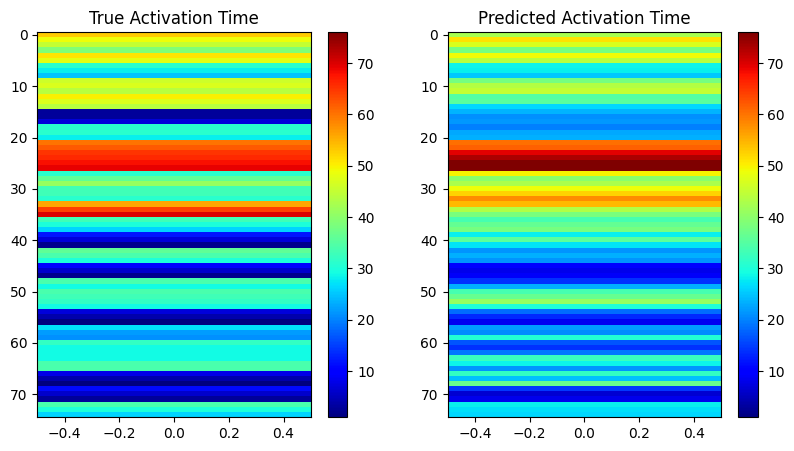

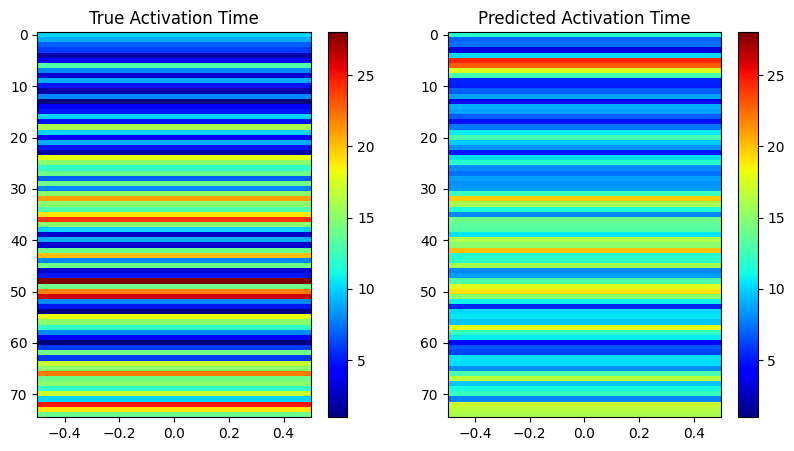

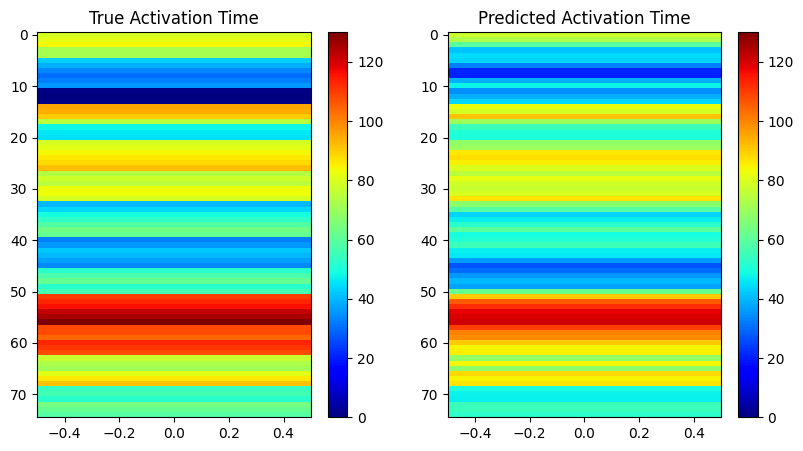

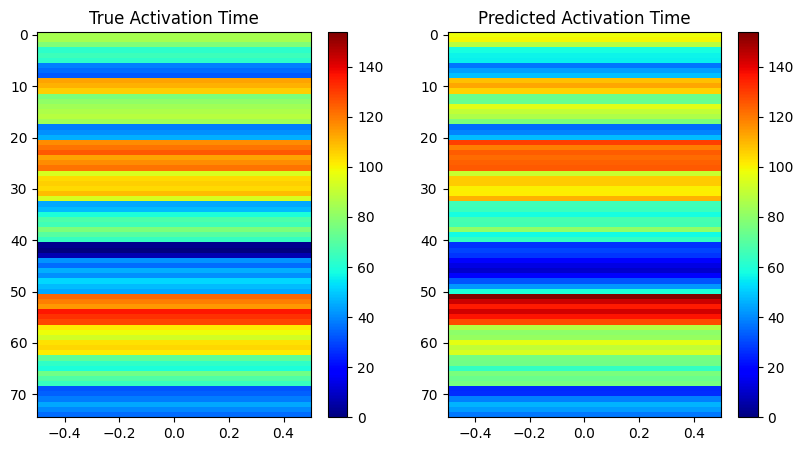

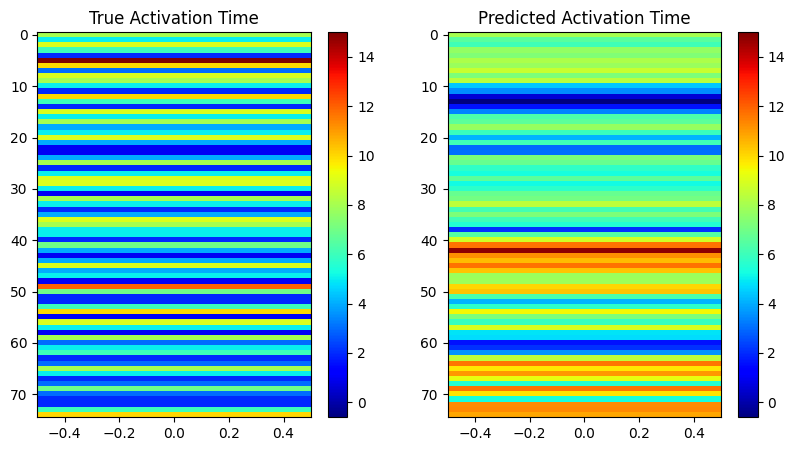

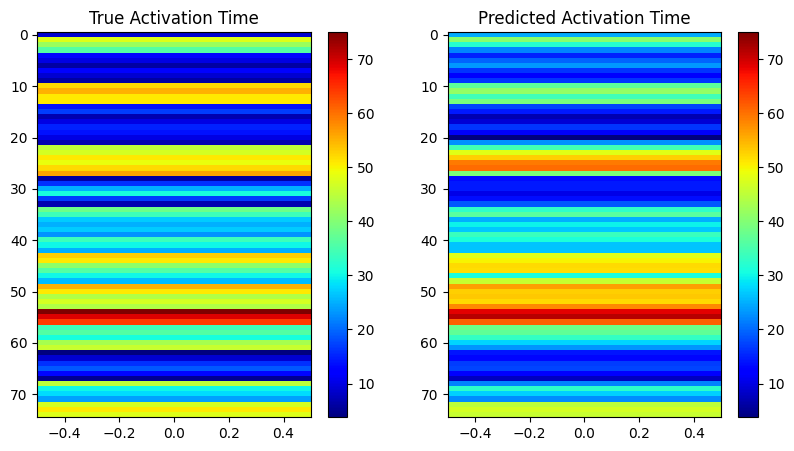

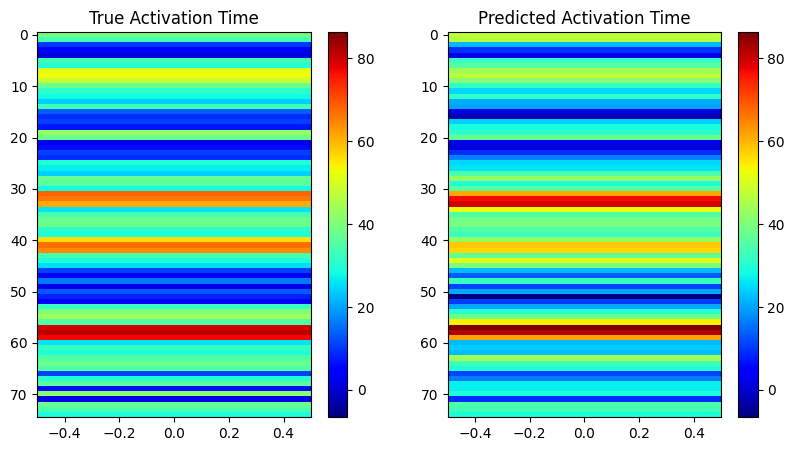

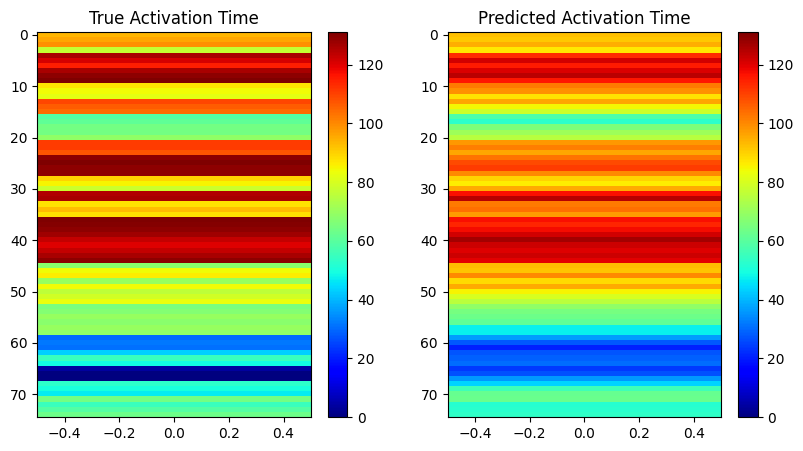

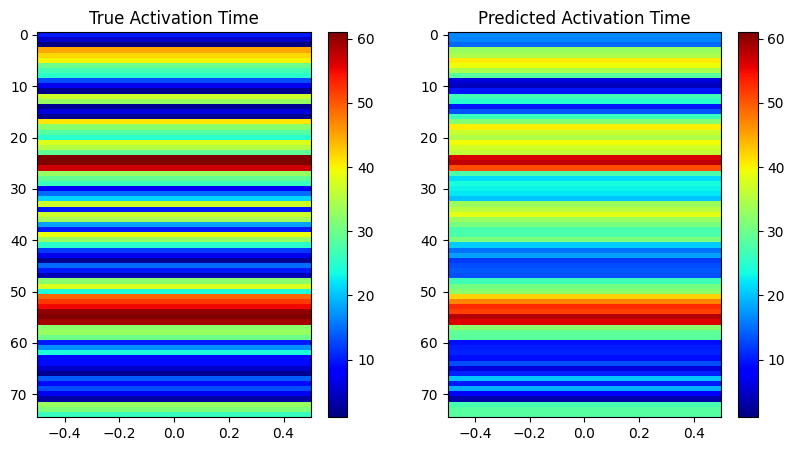

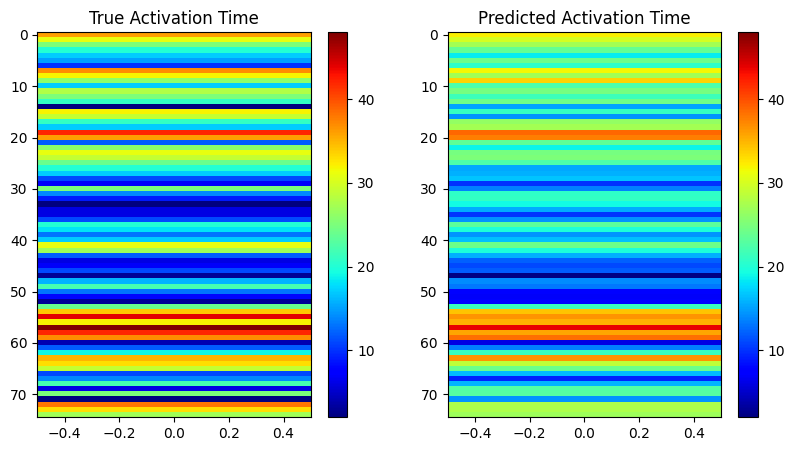

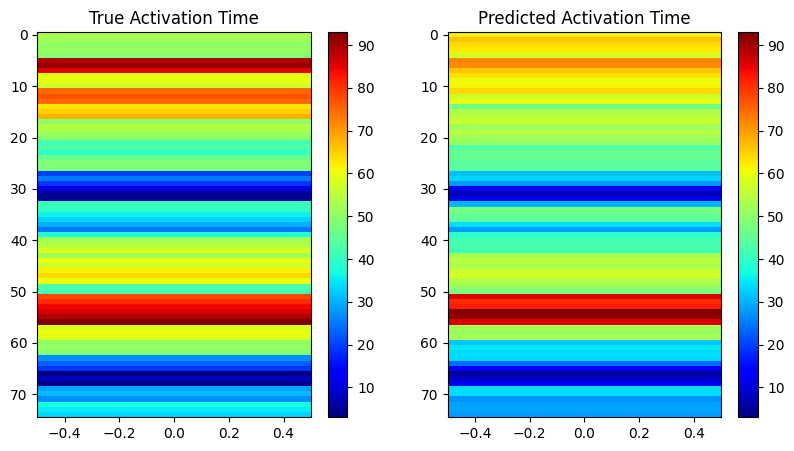

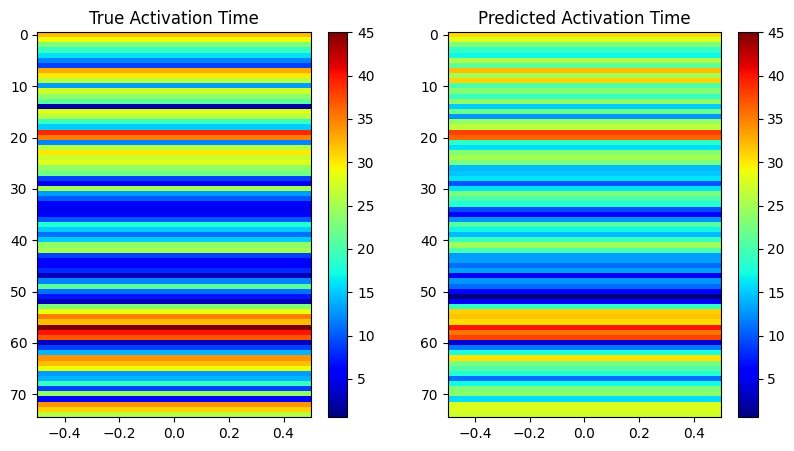

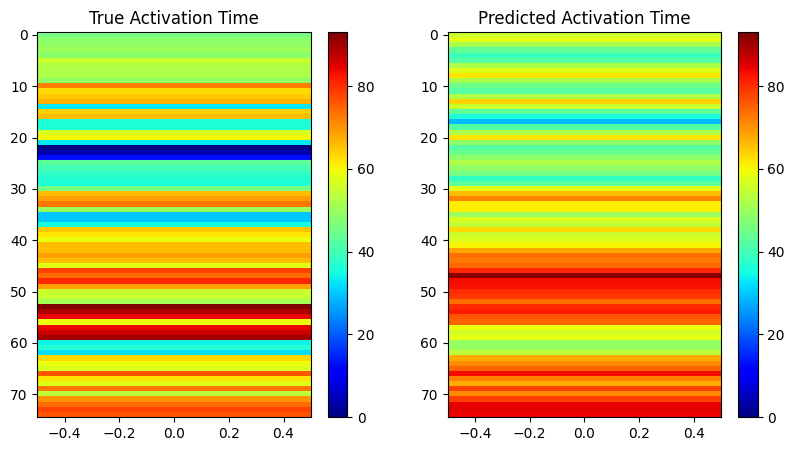

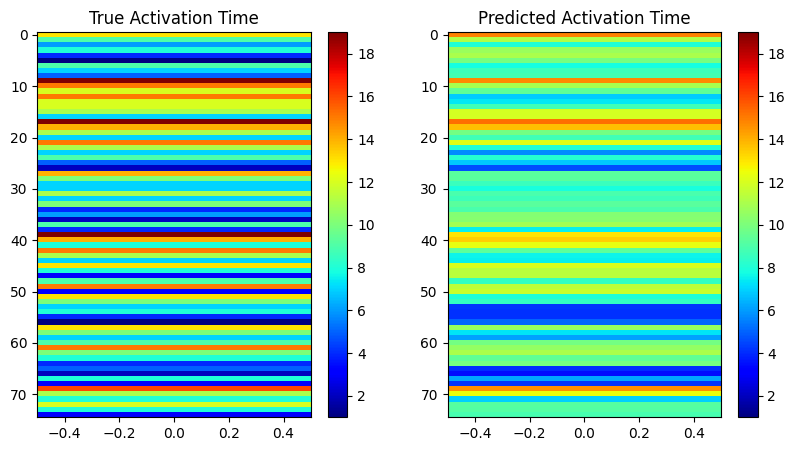

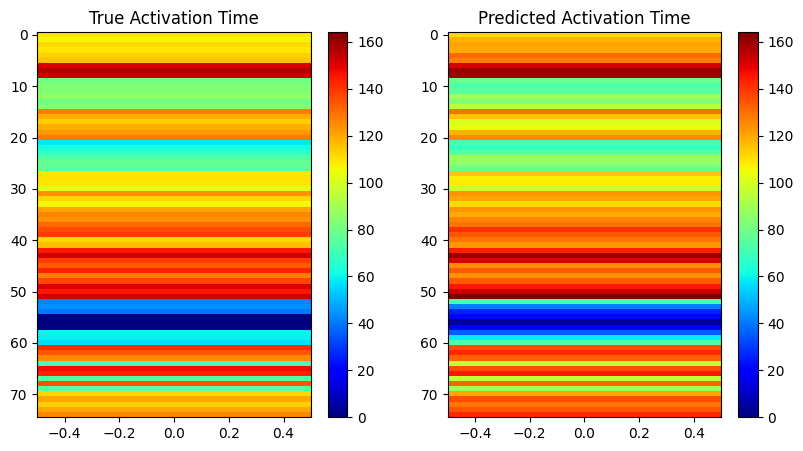

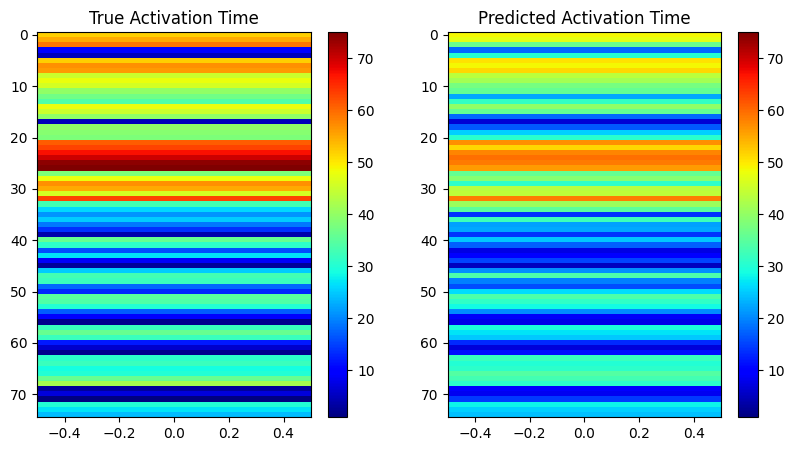

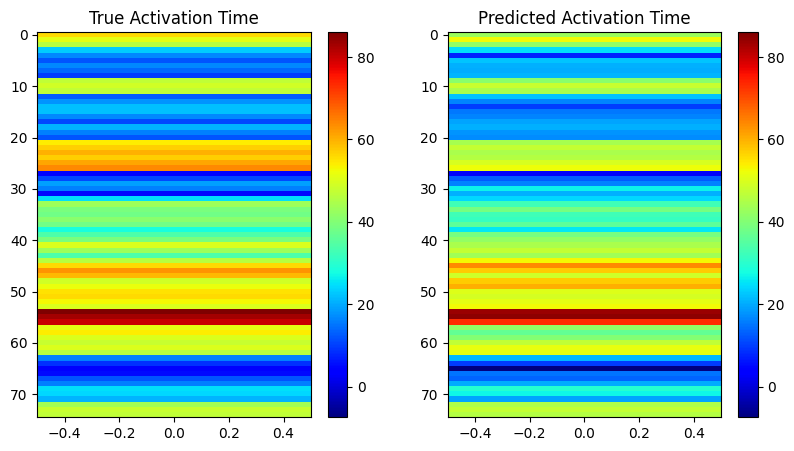

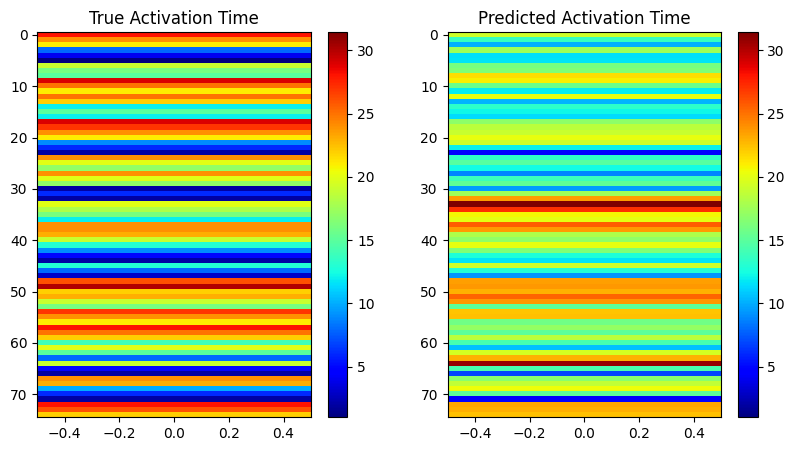

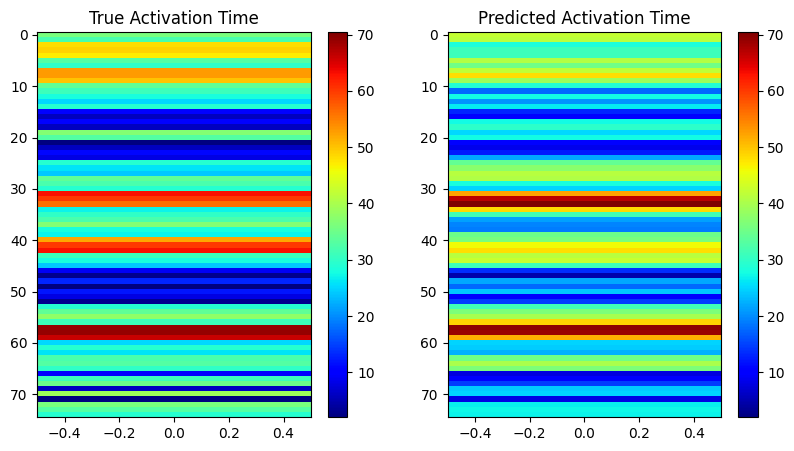

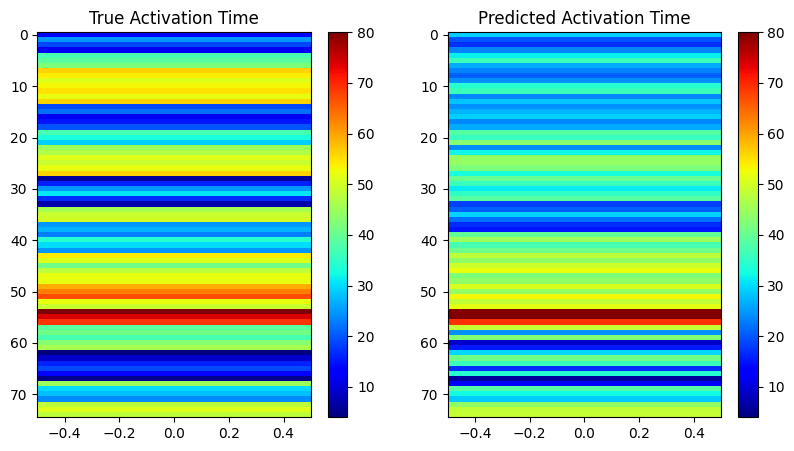

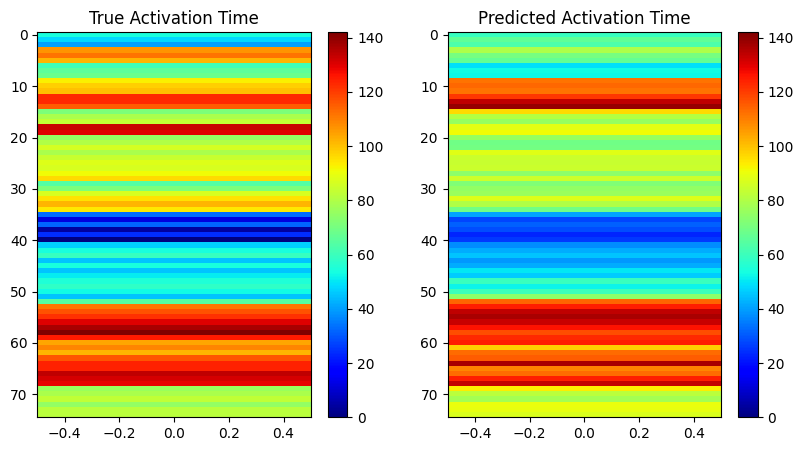

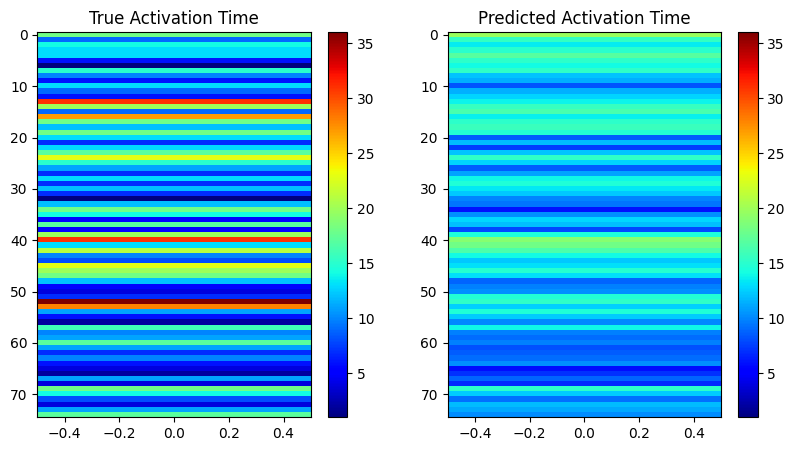

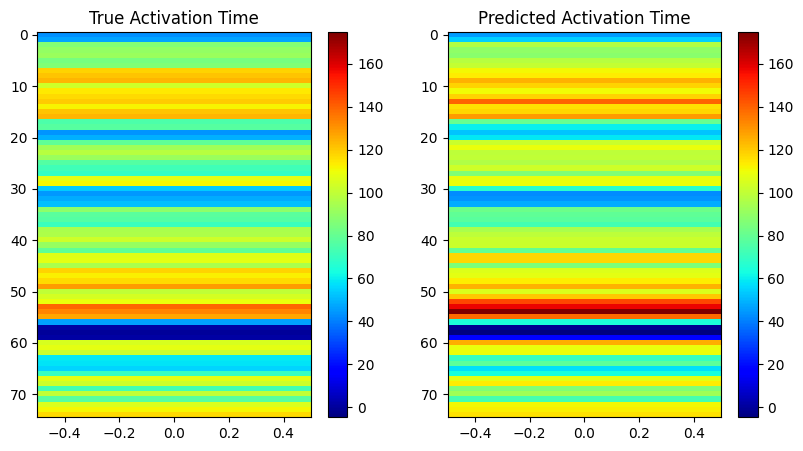

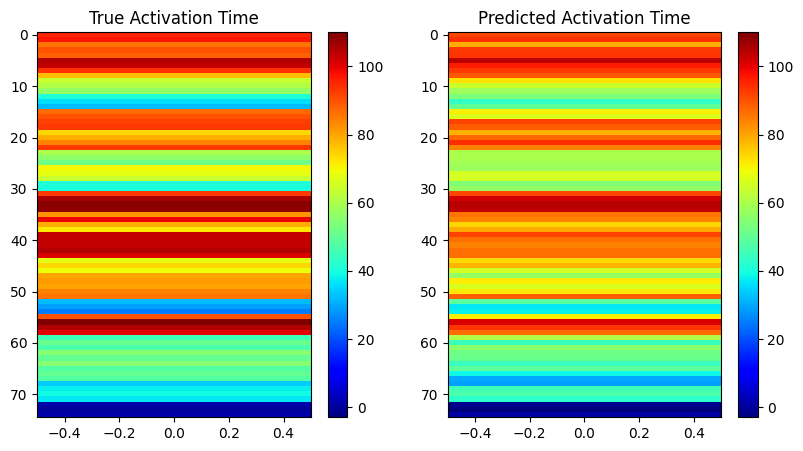

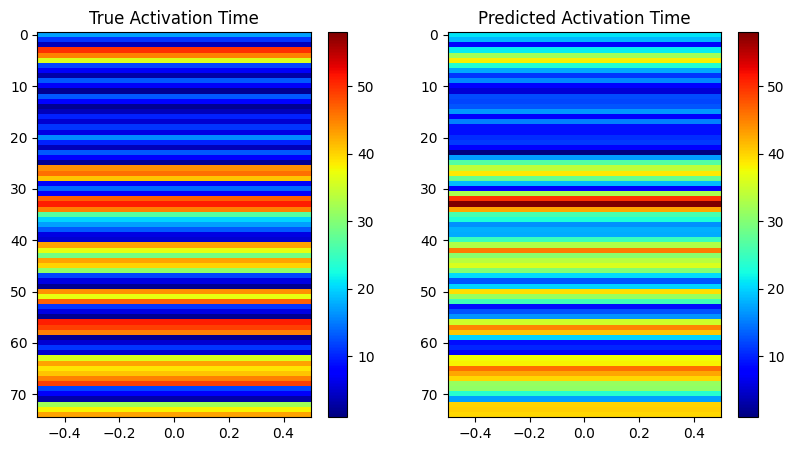

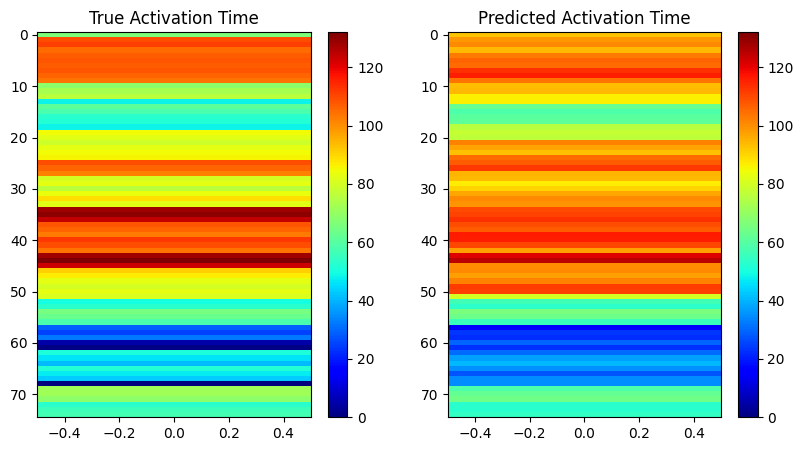

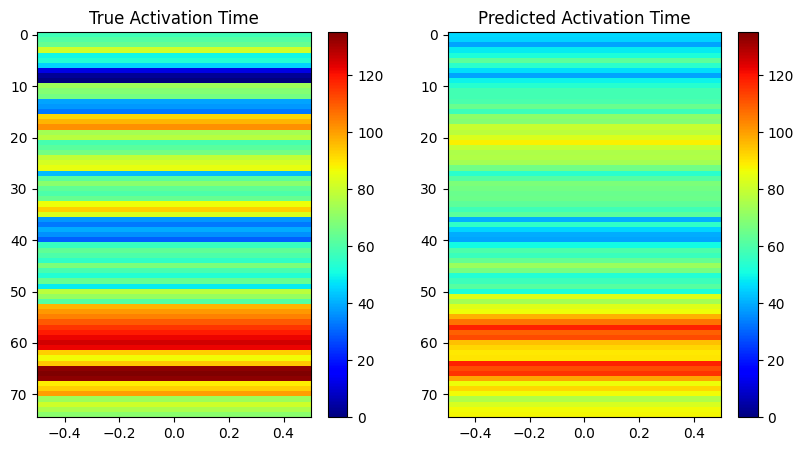

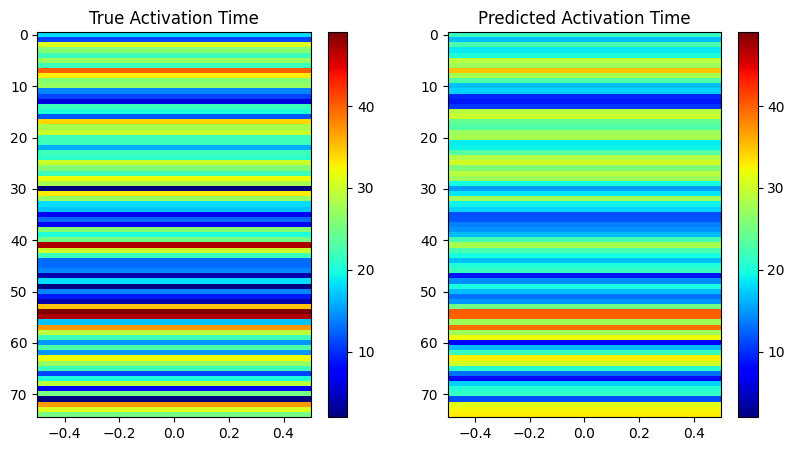

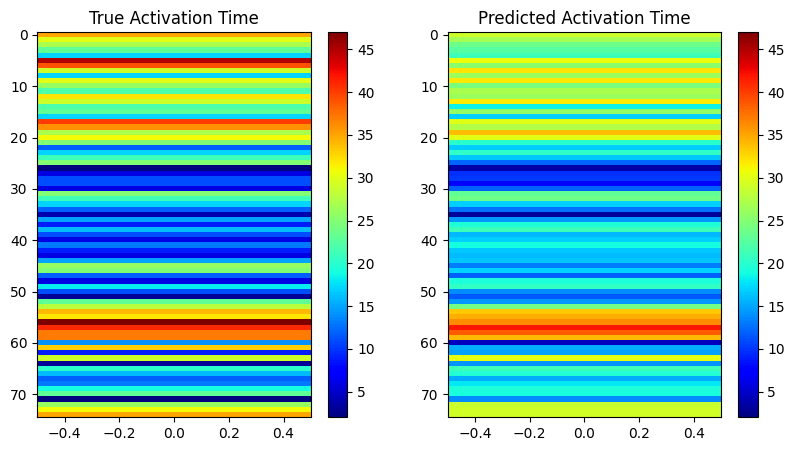

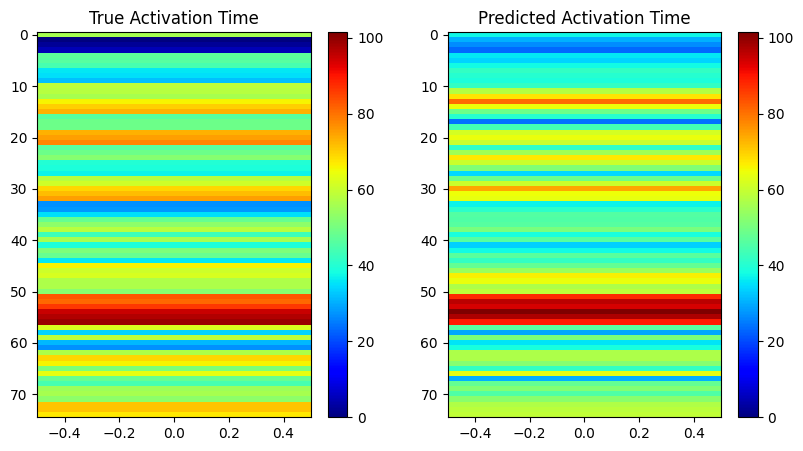

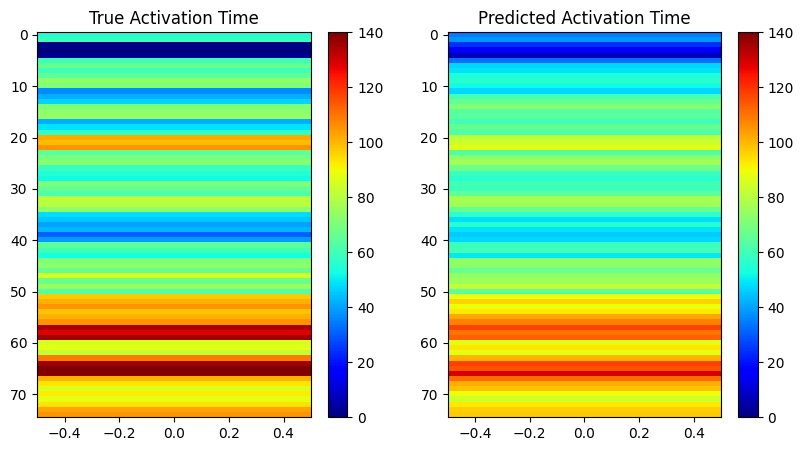

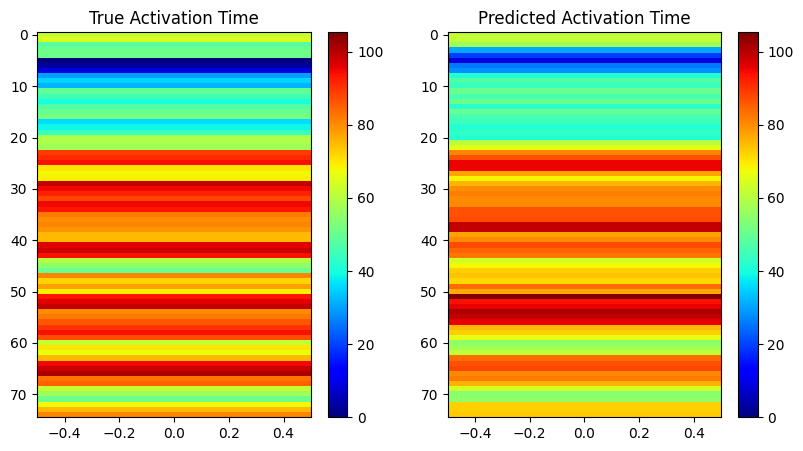

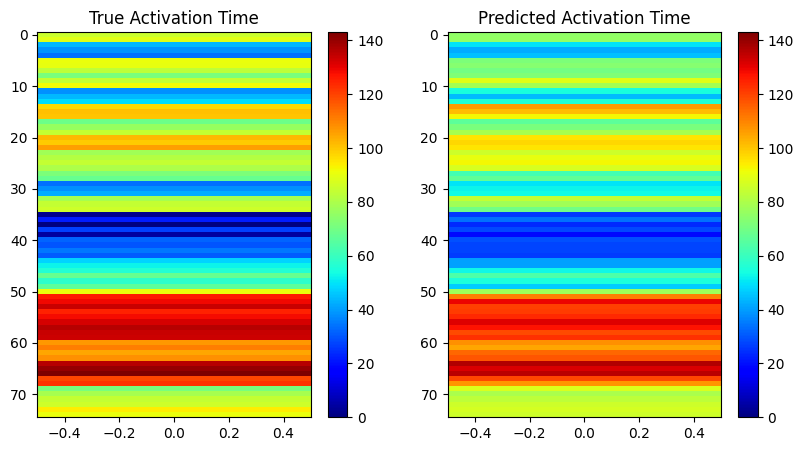

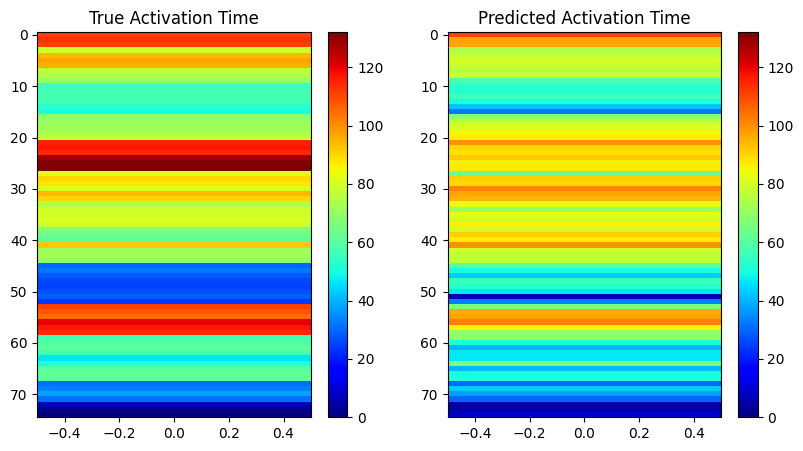

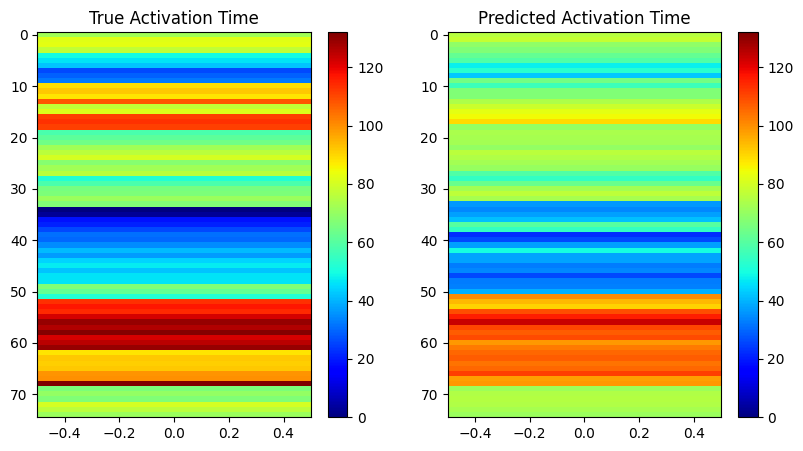

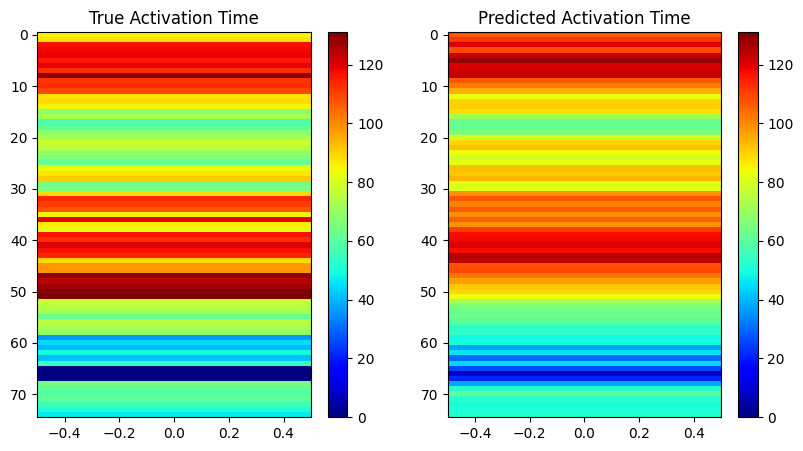

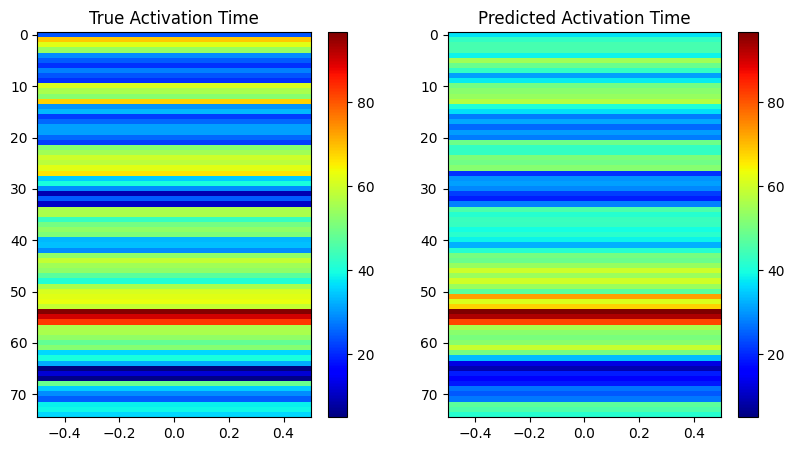

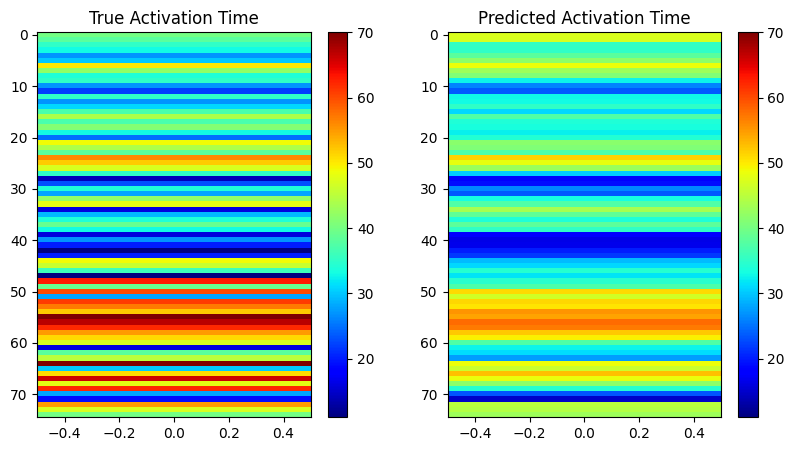

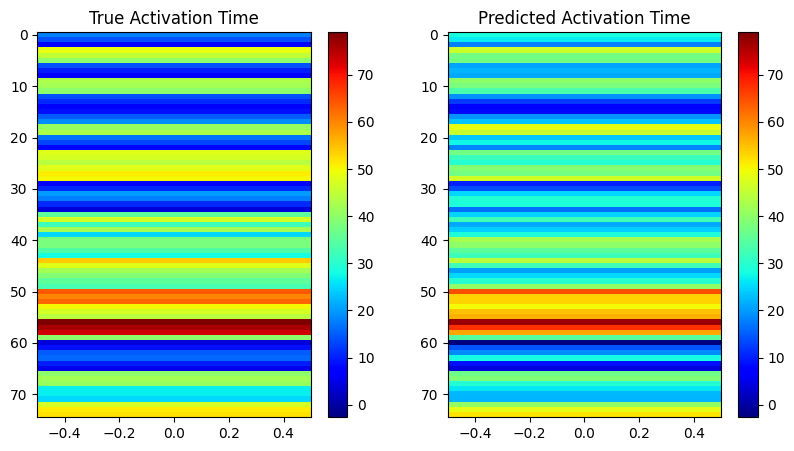

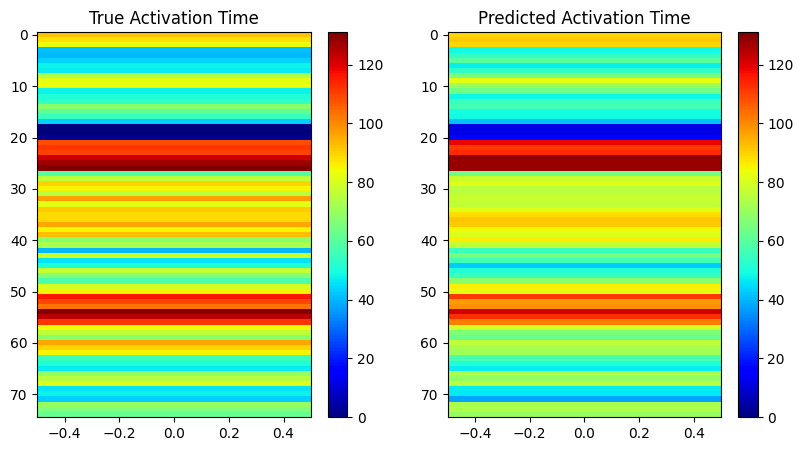

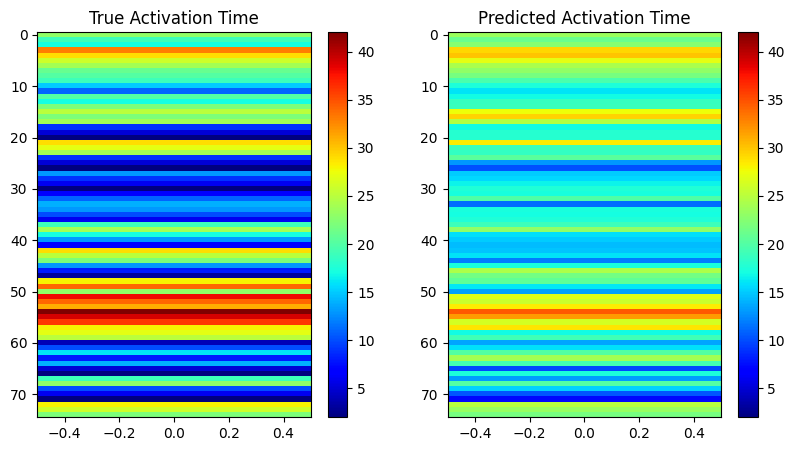

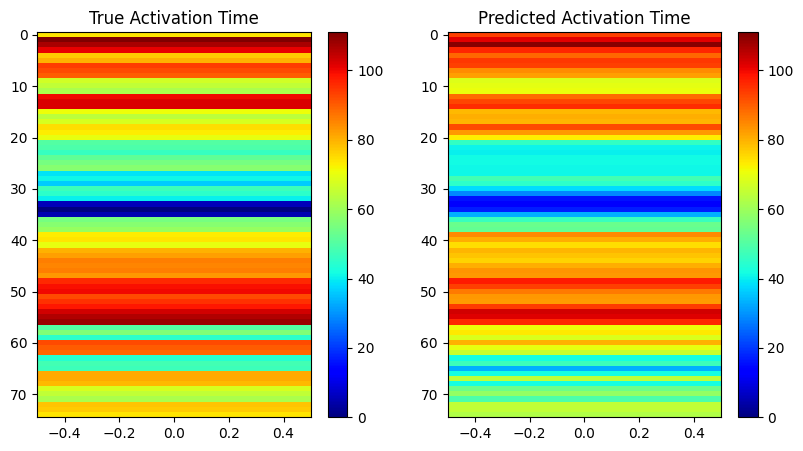

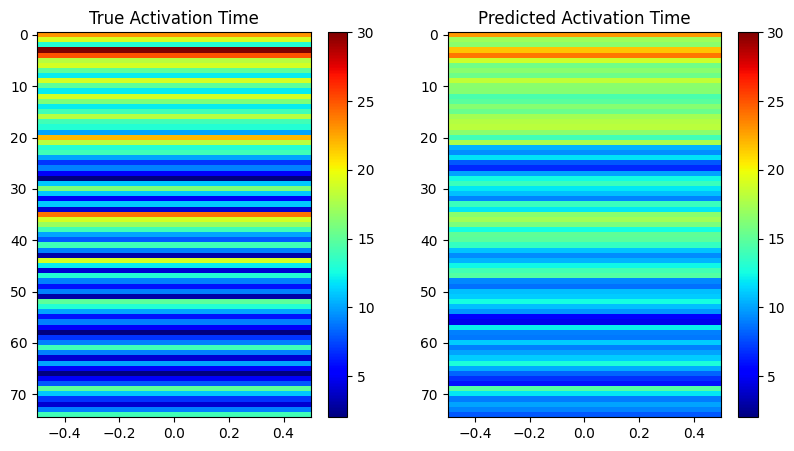

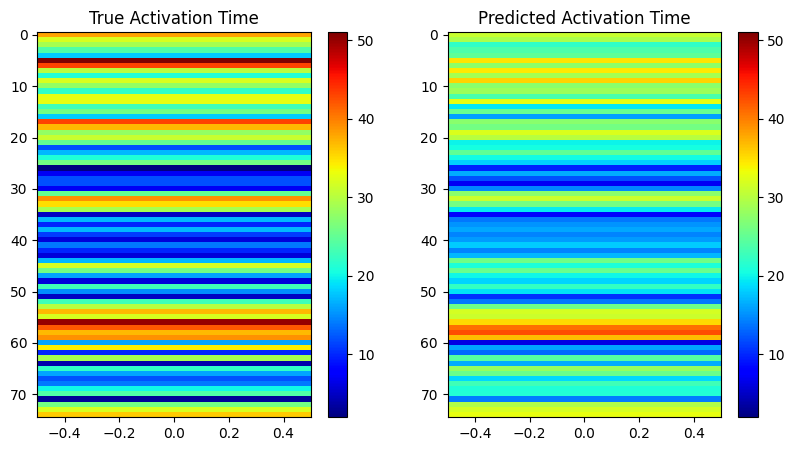

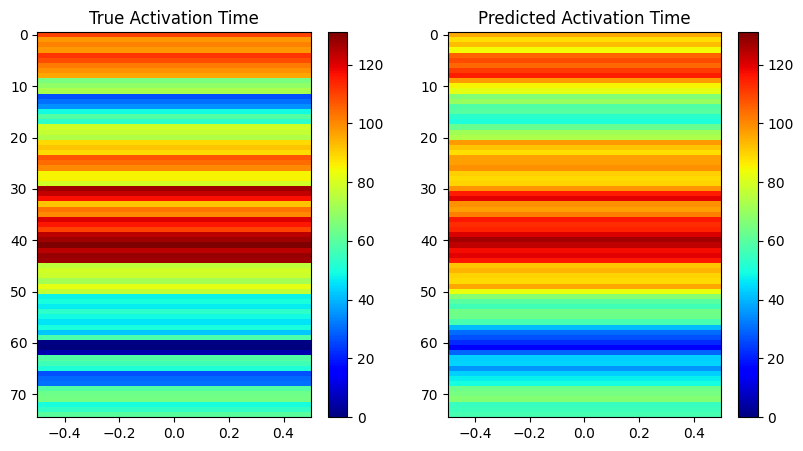

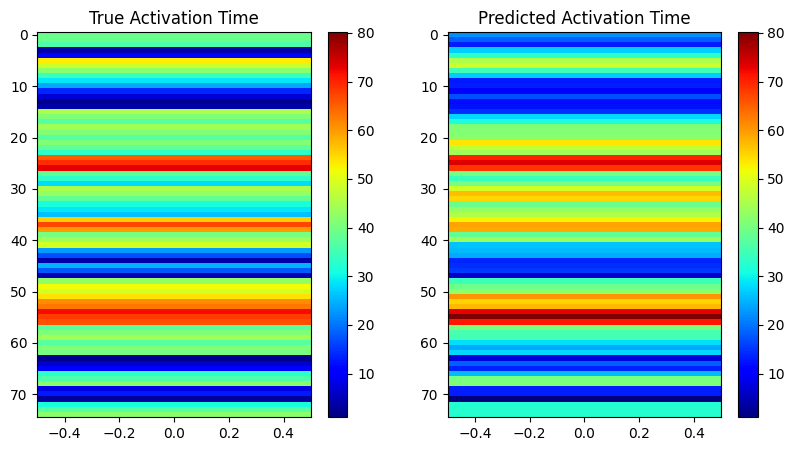

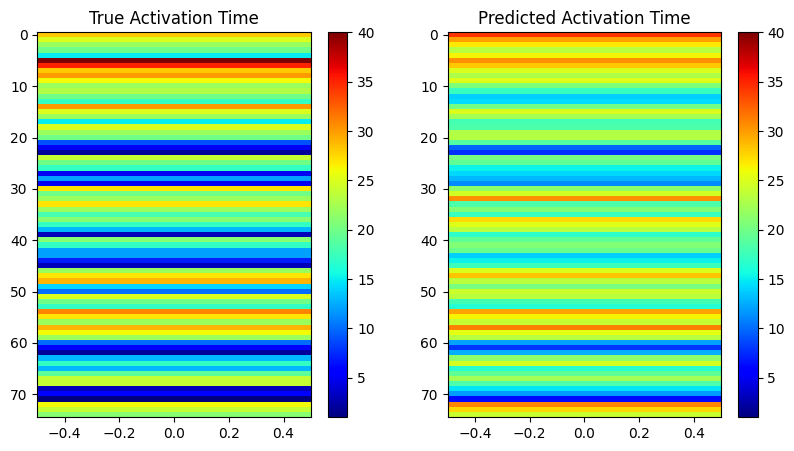

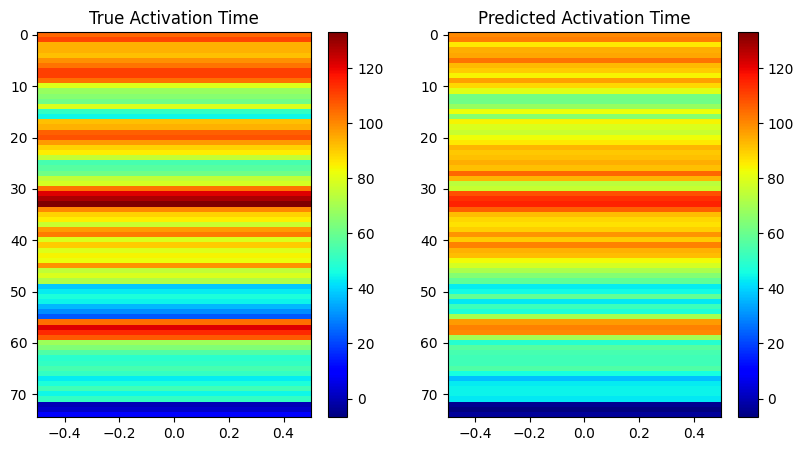

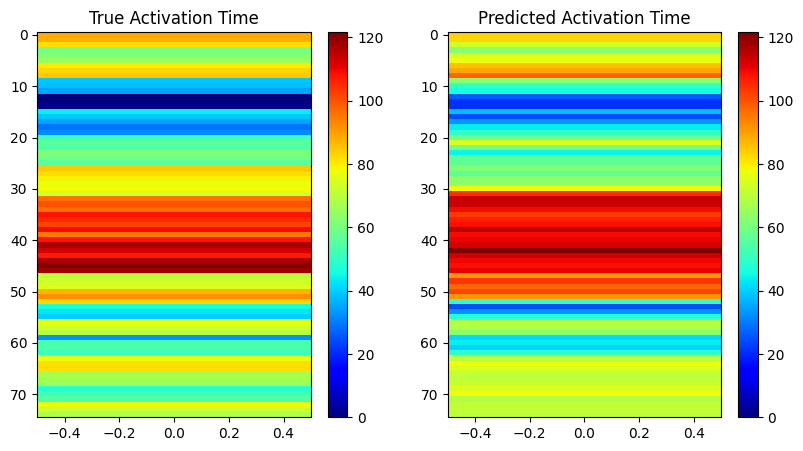

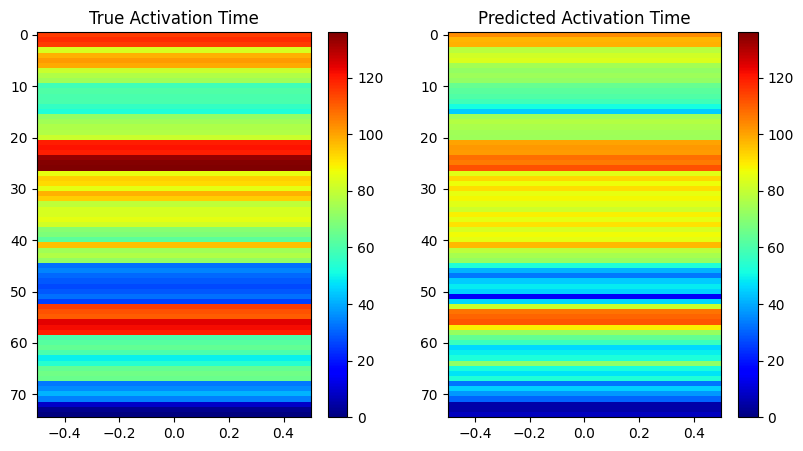

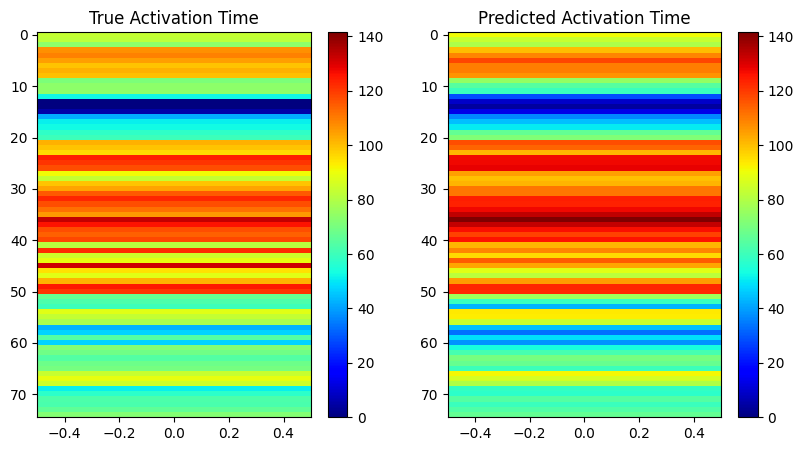

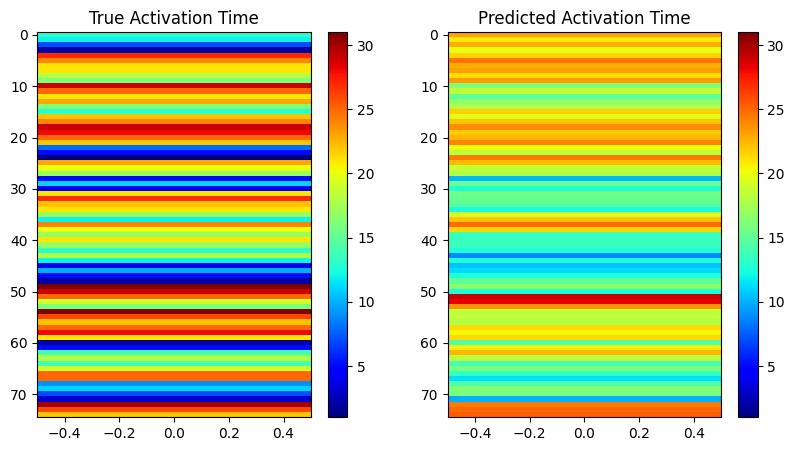

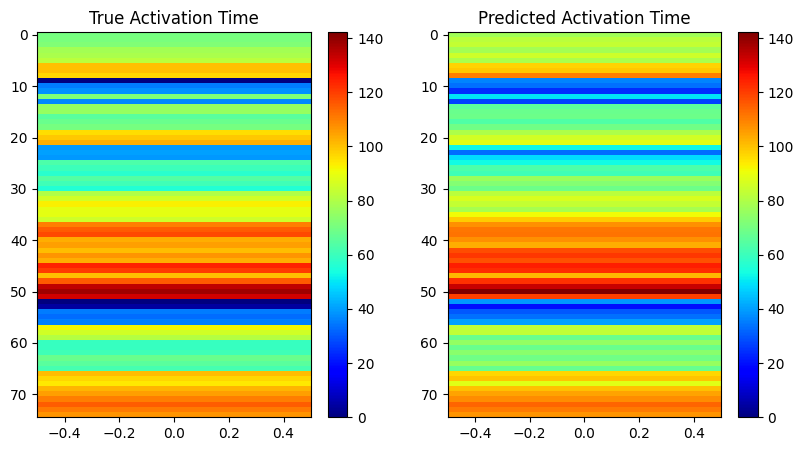

In [25]:
# Predict on test data  
y_pred = model.predict(X_test)

for i in range(100):
    plt.figure(figsize=(15, 5))
    
    v_min = np.min([y_test[i], y_pred[i]])
    v_max = np.max([y_test[i], y_pred[i]])  
    
    plt.subplot(1, 3, 1)
    plt.imshow(y_test[i].T, cmap='jet', interpolation='nearest', aspect='auto', vmin=v_min, vmax=v_max)
    plt.title('True Activation Time')
    plt.colorbar()
    
    plt.subplot(1, 3, 2)
    plt.imshow(y_pred[i].T, cmap='jet', interpolation='nearest', aspect='auto', vmin=v_min, vmax=v_max)
    plt.title('Predicted Activation Time')
    plt.colorbar()
    
    plt.show()

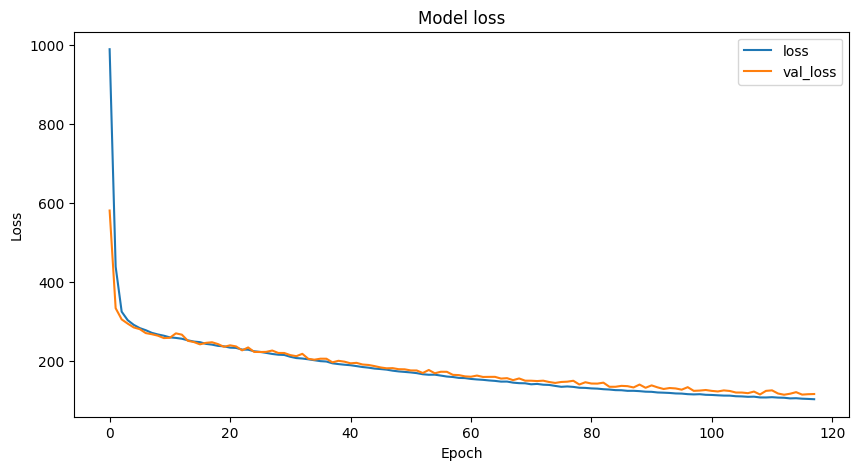

In [26]:
# Plot the history
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss') 
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()